# Individual Project 4 
**Author:** Christina Porter   
**Version:** 1.0  
**Semester:** Spring 2021  
**Summary:**  In this project, I will be analyzing a combination of three different datasets provided from the public data archive of Louisville, Kentucky. The three datasets I will be using describe crimes recorded by the Louisville Metro Police Department where some type of firearm was confiscated. These datasets consist of:
* firearm_data_intersections13to17, which describes incidents at traffic intersections
* FirearmAddress, which describes incidents at a residential or commercial address
* FirearmsData, which describes all incidents.
Each dataset contains different values. My goal is to merge them and do a further analysis on some trends that may be encased within the data.

**About:** This project is a sample of a project for Bellarmine University and Microsoft FutureLou. For more information, please visit https://cporter741.wixsite.com/butterflyprojectblog .

## Section 1: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatch
import matplotlib.cm as cmpl
import matplotlib.colors as mpcolors
import seaborn as sns
import squarify as sq
%matplotlib inline

## Section 2: Uploading my Data

In [2]:
def upload(fileName):
    df = pd.read_csv(fileName)
    return df

In [3]:
firearm_intersection = upload('fiream_data_intersections13to17.csv')

In [4]:
firearm_address = upload('FirearmAddress.csv')

In [5]:
firearm_general = upload('FirearmsData.csv')

In [6]:
jan_firearm_auction = upload('Jan2021FirearmsAuction.csv')

## Section 3: Exploring my Data

Before I can merge these datasets, I want to make sure the column names and values are the same.

### 3.1: Intersection Dataset

In [7]:
firearm_intersection.head()

,incident_number,ucr_category,type_of_firearm,firearm_manufacturer,firearm_model,firearm_caliber,recovery_date,address_geocode_type,recovery_block_address,city,...,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,address_concat,x,y,longitude,latitude,confidence,source
0,80-13-097166,Narcotics,"Pistol, Semi-automatic ...",Ruger,Sr9c,9MM,2013-12-20 00:00:00+00,INTERSECTION,N 22nd St / Bank St,Louisville,...,Black,M,21.0,N 22nd St / Bank St Louisville KY 40203,NaN,NaN,NaN,NaN,NaN,NaN
1,80-11-044948,Wpns Law Violation,"Pistol, Semi-automatic ...",Intratec,NaN,9MM,2011-06-11 00:00:00+00,INTERSECTION,7th Street Rd / Berry Blvd,Louisville,...,Black,M,20.0,7th Street Rd / Berry Blvd Louisville KY 40216,NaN,NaN,NaN,NaN,NaN,NaN
2,80-11-037378,Narcotics,"Rifle, Semi-automatic ...",Norinco,Sks,762M,2011-05-16 00:00:00+00,INTERSECTION,N 37th St / Bank St,Louisville,...,White,M,27.0,N 37th St / Bank St Louisville KY 40212,NaN,NaN,NaN,NaN,NaN,NaN
3,80-12-061676,Wpns Law Violation,"Pistol, Revolver ...",NaN,NaN,38C,2012-08-03 00:00:00+00,INTERSECTION,Dixie Hwy / Ralph Ave,Shively,...,Black,M,53.0,Dixie Hwy / Ralph Ave Shively KY,1195202.125,260851.7188,-85.799466,38.206025,NaN,LOJIC
4,80-12-010689,Narcotics,Null,NaN,Airmaster,NaN,2012-02-16 00:00:00+00,INTERSECTION,Oxmoor Ln / Shelbyville Rd,Norwood,...,White,M,36.0,Oxmoor Ln / Shelbyville Rd Norwood KY 40222,1248916.500,275799.8750,-85.613325,38.249400,NaN,LOJIC


In [8]:
firearm_intersection.columns

Index(['incident_number', 'ucr_category', 'type_of_firearm',
       'firearm_manufacturer', 'firearm_model', 'firearm_caliber',
       'recovery_date', 'address_geocode_type', 'recovery_block_address',
       'city', 'state', 'recovery_zipcode', 'person_recovered_from_race',
       'person_recovered_from_sex', 'person_recovered_from_age',
       'address_concat', 'x', 'y', 'longitude', 'latitude', 'confidence',
       'source'],
      dtype='object')

In [9]:
firearm_intersection.dtypes

incident_number                object
ucr_category                   object
type_of_firearm                object
firearm_manufacturer           object
firearm_model                  object
firearm_caliber                object
recovery_date                  object
address_geocode_type           object
recovery_block_address         object
city                           object
state                          object
recovery_zipcode              float64
person_recovered_from_race     object
person_recovered_from_sex      object
person_recovered_from_age     float64
address_concat                 object
x                             float64
y                             float64
longitude                     float64
latitude                      float64
confidence                    float64
source                         object
dtype: object

### 3.2: Address Dataset

In [10]:
firearm_address.head()

,INCIDENT_NUMBER,UCR_CATEGORY,TYPE_OF_FIREARM,FIREARM_MANUFACTURER,FIREARM_MODEL,FIREARM_CALIBER,RECOVERY_DATE,ADDRESS_GEOCODE_TYPE,RECOVERY__ADDRESS,CITY,state,RECOVERY_ZIPCODE,PERSON_RECOVERED_FROM_RACE,PERSON_RECOVERED_FROM_SEX,PERSON_RECOVERED_FROM_AGE,Address_Concat,Longitude,Latitude,Confidence,Source
0,80-10-011494,Wpns Law Violation,"Pistol, Semi-automatic",Manurin S.A.,NaN,765M,2010-02-17T00:00:00Z,BLOCK,9400 National Tpke,Louisville,KY,40118.0,White,M,44.0,9400 National Tpke Louisville KY 40118,-85.752898,38.125321,0.54,openaddresses
1,80-10-011506,Narcotics,"Shotgun, Pump Action",Remington Arms,Shotgun: Model,20GA,2010-02-17T00:00:00Z,BLOCK,4500 Landside Dr,Louisville,KY,40220.0,Black,M,19.0,4500 Landside Dr Louisville KY 40220,-85.620998,38.198673,1.00,openaddresses
2,80-10-011506,Narcotics,"Shotgun, Pump Action",Remington Arms,Shotgun: Model,20GA,2010-02-17T00:00:00Z,BLOCK,4500 Landside Dr,Louisville,KY,40220.0,Black,M,19.0,4500 Landside Dr Louisville KY 40220,-85.620998,38.198673,1.00,openaddresses
3,80-10-011506,Narcotics,"Shotgun, Pump Action",Remington Arms,Shotgun: Model,20GA,2010-02-17T00:00:00Z,BLOCK,4500 Landside Dr,Louisville,KY,40220.0,Black,M,19.0,4500 Landside Dr Louisville KY 40220,-85.620998,38.198673,1.00,openaddresses
4,80-10-011506,Narcotics,"Shotgun, Pump Action",Remington Arms,Shotgun: Model,20GA,2010-02-17T00:00:00Z,BLOCK,4500 Landside Dr,Louisville,KY,40220.0,Black,M,19.0,4500 Landside Dr Louisville KY 40220,-85.620998,38.198673,1.00,openaddresses


In [11]:
firearm_address.columns

Index(['INCIDENT_NUMBER', 'UCR_CATEGORY', 'TYPE_OF_FIREARM',
       'FIREARM_MANUFACTURER', 'FIREARM_MODEL', 'FIREARM_CALIBER',
       'RECOVERY_DATE', 'ADDRESS_GEOCODE_TYPE', 'RECOVERY__ADDRESS', 'CITY',
       'state', 'RECOVERY_ZIPCODE', 'PERSON_RECOVERED_FROM_RACE',
       'PERSON_RECOVERED_FROM_SEX', 'PERSON_RECOVERED_FROM_AGE',
       'Address_Concat', 'Longitude', 'Latitude', 'Confidence', 'Source'],
      dtype='object')

In [12]:
firearm_address.dtypes

INCIDENT_NUMBER                object
UCR_CATEGORY                   object
TYPE_OF_FIREARM                object
FIREARM_MANUFACTURER           object
FIREARM_MODEL                  object
FIREARM_CALIBER                object
RECOVERY_DATE                  object
ADDRESS_GEOCODE_TYPE           object
RECOVERY__ADDRESS              object
CITY                           object
state                          object
RECOVERY_ZIPCODE              float64
PERSON_RECOVERED_FROM_RACE     object
PERSON_RECOVERED_FROM_SEX      object
PERSON_RECOVERED_FROM_AGE     float64
Address_Concat                 object
Longitude                     float64
Latitude                      float64
Confidence                    float64
Source                         object
dtype: object

### 3.3: General Dataset

In [13]:
firearm_general.head()

,INCIDENT_NUMBER,UCR_CATEGORY,TYPE_OF_FIREARM,FIREARM_MANUFACTURER,FIREARM_MODEL,FIREARM_CALIBER,RECOVERY_DATE,RECOVERY_BLOCK_ADDRESS,CITY,state,RECOVERY_ZIPCODE,PERSON_RECOVERED_FROM_RACE,PERSON_RECOVERED_FROM_SEX,PERSON_RECOVERED_FROM_AGE,year
0,80-06-008380,HOMICIDE,NaN,NaN,NaN,NaN,NaN,NaN,LOUISVILLE,KY,40202,NaN,NaN,NaN,NaN
1,80-10-002211,HOMICIDE,NaN,NaN,NaN,NaN,NaN,NaN,LOUISVILLE,KY,40202,NaN,NaN,NaN,NaN
2,80-10-002211,HOMICIDE,NaN,NaN,NaN,NaN,NaN,NaN,LOUISVILLE,KY,40202,NaN,NaN,NaN,NaN
3,80-17-000578,SUICIDE,NaN,NaN,NaN,NaN,NaN,NaN,LOUISVILLE,KY,40272,NaN,NaN,NaN,NaN
4,80-17-001680,SUICIDE,NaN,NaN,NaN,NaN,NaN,NaN,LOUISVILLE,KY,40272,NaN,NaN,NaN,NaN


In [14]:
firearm_general.columns

Index(['INCIDENT_NUMBER', 'UCR_CATEGORY', 'TYPE_OF_FIREARM',
       'FIREARM_MANUFACTURER', 'FIREARM_MODEL', 'FIREARM_CALIBER',
       'RECOVERY_DATE', 'RECOVERY_BLOCK_ADDRESS', 'CITY', 'state',
       'RECOVERY_ZIPCODE', 'PERSON_RECOVERED_FROM_RACE',
       'PERSON_RECOVERED_FROM_SEX', 'PERSON_RECOVERED_FROM_AGE', 'year'],
      dtype='object')

In [15]:
firearm_general.dtypes

INCIDENT_NUMBER                object
UCR_CATEGORY                   object
TYPE_OF_FIREARM                object
FIREARM_MANUFACTURER           object
FIREARM_MODEL                  object
FIREARM_CALIBER                object
RECOVERY_DATE                  object
RECOVERY_BLOCK_ADDRESS         object
CITY                           object
state                          object
RECOVERY_ZIPCODE               object
PERSON_RECOVERED_FROM_RACE     object
PERSON_RECOVERED_FROM_SEX      object
PERSON_RECOVERED_FROM_AGE     float64
year                          float64
dtype: object

## Section 4: Changing the Data Format

The column names are the same except for some additions in firearm_general and firearm_intersection, so I just want to make sure that the names look exactly the same before I combine the datasets.

### 4.1: Changing the upper-case column names to lower-case

In [16]:
firearm_address.columns = ['incident_number',
                          'ucr_category',
                          'type_of_firearm',
                          'firearm_manufacturer',
                          'firearm_model',
                          'firearm_caliber',
                          'recovery_date',
                          'address_geocode_type',
                          'recovery_address',
                          'city',
                          'state',
                          'recovery_zipcode',
                          'person_recovered_from_race',
                          'person_recovered_from_sex',
                          'person_recovered_from_age',
                          'address_concat',
                          'longitude',
                          'latitude',
                          'confidence',
                          'source']

In [17]:
firearm_general.columns = ['incident_number',
                          'ucr_category',
                          'type_of_firearm',
                          'firearm_manufacturer',
                          'firearm_model',
                          'firearm_caliber',
                          'recovery_date',
                          'recovery_block_address',
                          'city',
                          'state',
                          'recovery_zipcode',
                          'person_recovered_from_race',
                          'person_recovered_from_sex',
                          'person_recovered_from_age',
                          'year']

In [18]:
firearm_address.columns

Index(['incident_number', 'ucr_category', 'type_of_firearm',
       'firearm_manufacturer', 'firearm_model', 'firearm_caliber',
       'recovery_date', 'address_geocode_type', 'recovery_address', 'city',
       'state', 'recovery_zipcode', 'person_recovered_from_race',
       'person_recovered_from_sex', 'person_recovered_from_age',
       'address_concat', 'longitude', 'latitude', 'confidence', 'source'],
      dtype='object')

In [19]:
firearm_general.columns

Index(['incident_number', 'ucr_category', 'type_of_firearm',
       'firearm_manufacturer', 'firearm_model', 'firearm_caliber',
       'recovery_date', 'recovery_block_address', 'city', 'state',
       'recovery_zipcode', 'person_recovered_from_race',
       'person_recovered_from_sex', 'person_recovered_from_age', 'year'],
      dtype='object')

In [20]:
firearm_intersection.columns

Index(['incident_number', 'ucr_category', 'type_of_firearm',
       'firearm_manufacturer', 'firearm_model', 'firearm_caliber',
       'recovery_date', 'address_geocode_type', 'recovery_block_address',
       'city', 'state', 'recovery_zipcode', 'person_recovered_from_race',
       'person_recovered_from_sex', 'person_recovered_from_age',
       'address_concat', 'x', 'y', 'longitude', 'latitude', 'confidence',
       'source'],
      dtype='object')

### 4.2: Dropping Duplicate Rows

Now that I have ensured all my columns look the same and contain the same names, I want to drop all of my duplicate rows before I merge them.

In [21]:
firearm_intersection = firearm_intersection.drop_duplicates()

In [22]:
firearm_address = firearm_address.drop_duplicates()

In [23]:
firearm_general = firearm_general.drop_duplicates()

### 4.3: Changing data values from upper-case to lower-case

In the datasets where we had to change the column names from upper case to lower case, the data within is also in lower case. Let's see if we can go ahead and change these data values from objects to strings and from upper case to lower case at the same time. Luckily, the only dataset we should have to do this with is the firearm_general.

In [24]:
firearm_general['ucr_category'] = firearm_general['ucr_category'].str.title()
firearm_general['type_of_firearm'] = firearm_general['type_of_firearm'].str.title()
firearm_general['firearm_manufacturer'] = firearm_general['firearm_manufacturer'].str.title()
firearm_general['firearm_model'] = firearm_general['firearm_model'].str.title()
firearm_general['recovery_block_address'] = firearm_general['recovery_block_address'].str.title()
firearm_general['city'] = firearm_general['city'].str.title()
firearm_general['person_recovered_from_race'] = firearm_general['person_recovered_from_race'].str.title()

In [25]:
firearm_general

,incident_number,ucr_category,type_of_firearm,firearm_manufacturer,firearm_model,firearm_caliber,recovery_date,recovery_block_address,city,state,recovery_zipcode,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,year
0,80-06-008380,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,40202,NaN,NaN,NaN,NaN
1,80-10-002211,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,40202,NaN,NaN,NaN,NaN
3,80-17-000578,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,40272,NaN,NaN,NaN,NaN
4,80-17-001680,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,40272,NaN,NaN,NaN,NaN
5,80-17-002802,Death Investigation,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,40211,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14843,80-10-000185,Narcotics,"Pistol, Semi-Automatic ...",Smith & Wesson ...,Sw40Ve,40C,1/1/2010,9200 Block Sissonne Dr ...,Louisville,KY,40118,White,M,27.0,2010.0
14845,80-09-099274,Aggravated Assault,"Pistol, Semi-Automatic ...",...,,9MM,12/31/2009,700 Block Heywood Ave ...,Louisville,KY,40208,Black,M,23.0,2009.0
14846,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0,2009.0
14847,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0,2009.0


### 4.4: Merging Datasets

#### 4.4.1: Merging the Intersection and Address sets

After several tries, I figured out the merge function doesn't enjoy having to merge with more than one identical column. I'm going to merge the intersection and address datasets first, then tack on the general after. Between the intersection and address datasets, the column I want to merge on is the incident_number, and the additional columns I want to add are the recovery_block_address, x, and y. 

So, I'm going to make a different dataframe called firearm_to_merge which contains all the columns from firearm_intersection that I want to merge with firearm_address.

In [26]:
firearm_to_merge = firearm_intersection[['incident_number', 'recovery_block_address', 'x', 'y']]

The original dataset included 2746 pieces of data (rows) and the one we want to merge has 2213 pieces of data, so we know that there were 533 duplicate rows in our data that were successfully dropped.

In [27]:
firearm_to_merge

,incident_number,recovery_block_address,x,y
0,80-13-097166,N 22nd St / Bank St,NaN,NaN
1,80-11-044948,7th Street Rd / Berry Blvd,NaN,NaN
2,80-11-037378,N 37th St / Bank St,NaN,NaN
3,80-12-061676,Dixie Hwy / Ralph Ave,1195202.125,260851.7188
4,80-12-010689,Oxmoor Ln / Shelbyville Rd,1248916.500,275799.8750
...,...,...,...,...
2741,80-13-089244,W Pages Ln / Terry Rd,NaN,NaN
2742,80-12-085476,W Southern Heights Ave / Wheeler Ave,1198203.750,254911.1250
2743,80-16-075482,W Southern Heights Ave / Woodruff Ave,1199311.250,254829.2813
2744,80-10-073277,Watterson Trl / Whitfield Dr,NaN,NaN


Now we can merge the data to get half the dataset we want.

**Actual Merge:**

In [28]:
firearm_half = pd.merge(firearm_address, firearm_to_merge, how = 'outer', on =["incident_number"])

In [29]:
firearm_half

,incident_number,ucr_category,type_of_firearm,firearm_manufacturer,firearm_model,firearm_caliber,recovery_date,address_geocode_type,recovery_address,city,...,person_recovered_from_sex,person_recovered_from_age,address_concat,longitude,latitude,confidence,source,recovery_block_address,x,y
0,80-10-011494,Wpns Law Violation,"Pistol, Semi-automatic",Manurin S.A.,NaN,765M,2010-02-17T00:00:00Z,BLOCK,9400 National Tpke,Louisville,...,M,44.0,9400 National Tpke Louisville KY 40118,-85.752898,38.125321,0.54,openaddresses,NaN,NaN,NaN
1,80-10-011506,Narcotics,"Shotgun, Pump Action",Remington Arms,Shotgun: Model,20GA,2010-02-17T00:00:00Z,BLOCK,4500 Landside Dr,Louisville,...,M,19.0,4500 Landside Dr Louisville KY 40220,-85.620998,38.198673,1.00,openaddresses,NaN,NaN,NaN
2,80-10-013628,Wpns Law Violation,"Pistol, Semi-automatic",Smith & Wesson,Sw40ve,40C,2010-02-25T00:00:00Z,BLOCK,2100 W Gaulbert Ave,Louisville,...,M,26.0,2100 W Gaulbert Ave Louisville KY 40210,-85.793435,38.227871,1.00,openaddresses,NaN,NaN,NaN
3,80-10-014366,Wpns Law Violation,"Pistol, Semi-automatic",NaN,NaN,9MM,2010-02-28T00:00:00Z,BLOCK,600 W Jefferson St,Louisville,...,NaN,NaN,600 W Jefferson St Louisville KY 40202,-85.761323,38.253961,1.00,openaddresses,NaN,NaN,NaN
4,80-10-015443,Theft Other,"Pistol, Semi-automatic","Glock, Inc.",Model 27 (40 Sw,40C,2010-03-05T00:00:00Z,BLOCK,9500 Preston Hwy,Louisville,...,F,23.0,9500 Preston Hwy Louisville KY 40229,-85.679636,38.112525,1.00,openaddresses,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10470,80-13-089244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W Pages Ln / Terry Rd,NaN,NaN
10471,80-12-085476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W Southern Heights Ave / Wheeler Ave,1198203.750,254911.1250
10472,80-16-075482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W Southern Heights Ave / Woodruff Ave,1199311.250,254829.2813
10473,80-10-073277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Watterson Trl / Whitfield Dr,NaN,NaN


Since we're merging two dataframes, I just want to double-check that there are no duplicates.

In [30]:
firearm_half = firearm_half.drop_duplicates()

In [31]:
firearm_half

,incident_number,ucr_category,type_of_firearm,firearm_manufacturer,firearm_model,firearm_caliber,recovery_date,address_geocode_type,recovery_address,city,...,person_recovered_from_sex,person_recovered_from_age,address_concat,longitude,latitude,confidence,source,recovery_block_address,x,y
0,80-10-011494,Wpns Law Violation,"Pistol, Semi-automatic",Manurin S.A.,NaN,765M,2010-02-17T00:00:00Z,BLOCK,9400 National Tpke,Louisville,...,M,44.0,9400 National Tpke Louisville KY 40118,-85.752898,38.125321,0.54,openaddresses,NaN,NaN,NaN
1,80-10-011506,Narcotics,"Shotgun, Pump Action",Remington Arms,Shotgun: Model,20GA,2010-02-17T00:00:00Z,BLOCK,4500 Landside Dr,Louisville,...,M,19.0,4500 Landside Dr Louisville KY 40220,-85.620998,38.198673,1.00,openaddresses,NaN,NaN,NaN
2,80-10-013628,Wpns Law Violation,"Pistol, Semi-automatic",Smith & Wesson,Sw40ve,40C,2010-02-25T00:00:00Z,BLOCK,2100 W Gaulbert Ave,Louisville,...,M,26.0,2100 W Gaulbert Ave Louisville KY 40210,-85.793435,38.227871,1.00,openaddresses,NaN,NaN,NaN
3,80-10-014366,Wpns Law Violation,"Pistol, Semi-automatic",NaN,NaN,9MM,2010-02-28T00:00:00Z,BLOCK,600 W Jefferson St,Louisville,...,NaN,NaN,600 W Jefferson St Louisville KY 40202,-85.761323,38.253961,1.00,openaddresses,NaN,NaN,NaN
4,80-10-015443,Theft Other,"Pistol, Semi-automatic","Glock, Inc.",Model 27 (40 Sw,40C,2010-03-05T00:00:00Z,BLOCK,9500 Preston Hwy,Louisville,...,F,23.0,9500 Preston Hwy Louisville KY 40229,-85.679636,38.112525,1.00,openaddresses,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10470,80-13-089244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W Pages Ln / Terry Rd,NaN,NaN
10471,80-12-085476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W Southern Heights Ave / Wheeler Ave,1198203.750,254911.1250
10472,80-16-075482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W Southern Heights Ave / Woodruff Ave,1199311.250,254829.2813
10473,80-10-073277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Watterson Trl / Whitfield Dr,NaN,NaN


Since we did an outer merge so we didn't lose data, we did have some duplicate values we had to get rid of. Now, we can go ahead and merge the general dataset.

#### 4.4.2: Adding on the General set

In [32]:
firearm_data = pd.merge(firearm_general, firearm_half, how='outer', on=['incident_number'])

In [33]:
firearm_data

,incident_number,ucr_category_x,type_of_firearm_x,firearm_manufacturer_x,firearm_model_x,firearm_caliber_x,recovery_date_x,recovery_block_address_x,city_x,state_x,...,person_recovered_from_sex_y,person_recovered_from_age_y,address_concat,longitude,latitude,confidence,source,recovery_block_address_y,x,y
0,80-06-008380,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
1,80-10-002211,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
2,80-17-000578,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
3,80-17-001680,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
4,80-17-002802,Death Investigation,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23656,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN
23657,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN
23658,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN
23659,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN


In [34]:
firearm_data = firearm_data.drop_duplicates()

In [35]:
firearm_data

,incident_number,ucr_category_x,type_of_firearm_x,firearm_manufacturer_x,firearm_model_x,firearm_caliber_x,recovery_date_x,recovery_block_address_x,city_x,state_x,...,person_recovered_from_sex_y,person_recovered_from_age_y,address_concat,longitude,latitude,confidence,source,recovery_block_address_y,x,y
0,80-06-008380,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
1,80-10-002211,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
2,80-17-000578,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
3,80-17-001680,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
4,80-17-002802,Death Investigation,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23656,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN
23657,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN
23658,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN
23659,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN


### 4.5: Looking at our newly merged dataset

This is our completed dataset. Now, we can go ahead and take a look at our columns.

In [36]:
firearm_data.columns

Index(['incident_number', 'ucr_category_x', 'type_of_firearm_x',
       'firearm_manufacturer_x', 'firearm_model_x', 'firearm_caliber_x',
       'recovery_date_x', 'recovery_block_address_x', 'city_x', 'state_x',
       'recovery_zipcode_x', 'person_recovered_from_race_x',
       'person_recovered_from_sex_x', 'person_recovered_from_age_x', 'year',
       'ucr_category_y', 'type_of_firearm_y', 'firearm_manufacturer_y',
       'firearm_model_y', 'firearm_caliber_y', 'recovery_date_y',
       'address_geocode_type', 'recovery_address', 'city_y', 'state_y',
       'recovery_zipcode_y', 'person_recovered_from_race_y',
       'person_recovered_from_sex_y', 'person_recovered_from_age_y',
       'address_concat', 'longitude', 'latitude', 'confidence', 'source',
       'recovery_block_address_y', 'x', 'y'],
      dtype='object')

In [37]:
firearm_data.dtypes

incident_number                  object
ucr_category_x                   object
type_of_firearm_x                object
firearm_manufacturer_x           object
firearm_model_x                  object
firearm_caliber_x                object
recovery_date_x                  object
recovery_block_address_x         object
city_x                           object
state_x                          object
recovery_zipcode_x               object
person_recovered_from_race_x     object
person_recovered_from_sex_x      object
person_recovered_from_age_x     float64
year                            float64
ucr_category_y                   object
type_of_firearm_y                object
firearm_manufacturer_y           object
firearm_model_y                  object
firearm_caliber_y                object
recovery_date_y                  object
address_geocode_type             object
recovery_address                 object
city_y                           object
state_y                          object


#### 4.5.1: Checking Split Columns for Duplicates

We have a TON of repeated columns here. I want to go ahead and make sure that the repeated columns aren't the same before I decide what to do with them.

In [38]:
print("ucr_category: "+ str(firearm_data['ucr_category_x'].equals(firearm_data['ucr_category_y'])))
print("type_of_firearm: " + str(firearm_data['type_of_firearm_x'].equals(firearm_data['type_of_firearm_y'])))
print("firearm_manufacturer: " + str(firearm_data['firearm_manufacturer_x'].equals(firearm_data['firearm_manufacturer_y'])))
print("firearm_model: " + str(firearm_data['firearm_model_x'].equals(firearm_data['firearm_model_y'])))
print("firearm_caliber: " + str(firearm_data['firearm_caliber_x'].equals(firearm_data['firearm_caliber_y'])))
print("recovery_date: " + str(firearm_data['recovery_date_x'].equals(firearm_data['recovery_date_y'])))
print("recovery_block_address: " + str(firearm_data['recovery_block_address_x'].equals(firearm_data['recovery_block_address_y'])))
print("city: " + str(firearm_data['city_x'].equals(firearm_data['city_y'])))
print("state: " + str(firearm_data['state_x'].equals(firearm_data['state_y'])))
print("recovery_zipcode: " + str(firearm_data['recovery_zipcode_x'].equals(firearm_data['recovery_zipcode_y'])))
print("person_recovered_from_race: " + str(firearm_data['person_recovered_from_race_x'].equals(firearm_data['person_recovered_from_race_y'])))
print("person_recovered_from_sex: " + str(firearm_data['person_recovered_from_sex_x'].equals(firearm_data['person_recovered_from_sex_y'])))
print("person_recovered_from_age: " + str(firearm_data['person_recovered_from_age_x'].equals(firearm_data['person_recovered_from_age_y'])))

ucr_category: False
type_of_firearm: False
firearm_manufacturer: False
firearm_model: False
firearm_caliber: False
recovery_date: False
recovery_block_address: False
city: False
state: False
recovery_zipcode: False
person_recovered_from_race: False
person_recovered_from_sex: False
person_recovered_from_age: False


So basically, none of these columns are the same. Can we merge them without overlapping values?

In [39]:
test_set = firearm_data

In [40]:
test_set

,incident_number,ucr_category_x,type_of_firearm_x,firearm_manufacturer_x,firearm_model_x,firearm_caliber_x,recovery_date_x,recovery_block_address_x,city_x,state_x,...,person_recovered_from_sex_y,person_recovered_from_age_y,address_concat,longitude,latitude,confidence,source,recovery_block_address_y,x,y
0,80-06-008380,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
1,80-10-002211,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
2,80-17-000578,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
3,80-17-001680,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
4,80-17-002802,Death Investigation,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23656,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN
23657,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN
23658,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN
23659,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,M,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN


In [41]:
test_set['ucr_category'] = test_set.ucr_category_x.combine_first(test_set.ucr_category_y)

In [42]:
test_set

,incident_number,ucr_category_x,type_of_firearm_x,firearm_manufacturer_x,firearm_model_x,firearm_caliber_x,recovery_date_x,recovery_block_address_x,city_x,state_x,...,person_recovered_from_age_y,address_concat,longitude,latitude,confidence,source,recovery_block_address_y,x,y,ucr_category
0,80-06-008380,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN,Homicide
1,80-10-002211,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN,Homicide
2,80-17-000578,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN,Suicide
3,80-17-001680,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN,Suicide
4,80-17-002802,Death Investigation,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,NaN,NaN,0.000000,0.000000,0.00,none,NaN,NaN,NaN,Death Investigation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23656,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN,Aggravated Assault
23657,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN,Aggravated Assault
23658,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN,Aggravated Assault
23659,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,56.0,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,NaN,NaN,Aggravated Assault


In [43]:
test_set_save = pd.DataFrame(test_set[['ucr_category', 'ucr_category_x', 'ucr_category_y']])

In [44]:
test_set_save

,ucr_category,ucr_category_x,ucr_category_y
0,Homicide,Homicide,Homicide
1,Homicide,Homicide,Homicide
2,Suicide,Suicide,Suicide
3,Suicide,Suicide,Suicide
4,Death Investigation,Death Investigation,Death Investigation
...,...,...,...
23656,Aggravated Assault,Aggravated Assault,Aggravated Assault
23657,Aggravated Assault,Aggravated Assault,Aggravated Assault
23658,Aggravated Assault,Aggravated Assault,Aggravated Assault
23659,Aggravated Assault,Aggravated Assault,Aggravated Assault


In [45]:
test_set_save.sample(30)

,ucr_category,ucr_category_x,ucr_category_y
11781,Narcotics,Narcotics,Narcotics
21720,Wpns Law Violation,Wpns Law Violation,Wpns Law Violation
7061,Wpns Law Violation,Wpns Law Violation,Wpns Law Violation
17727,Narcotics Equip,Narcotics Equip,Narcotics Equip
2300,Narcotics,Narcotics,Narcotics
13292,Intimidation,Intimidation,Intimidation
16612,Aggravated Assault,Aggravated Assault,Aggravated Assault
5876,Narcotics,Narcotics,Narcotics
9323,Narcotics,Narcotics,Narcotics
3243,Narcotics,Narcotics,Narcotics


#### 4.5.2: Merging Our Duplicate Columns

After taking a random sample of 30 values, it seems our values were merged the way we wanted them to be. I'm going to create a function so we can do this a bit easier for each column.

In [46]:
def merge_column(dataFrame, columnName):
    column_x = (columnName + '_x')
    column_y = (columnName + '_y')
    dataFrame[columnName] = dataFrame[column_x].combine_first(dataFrame[column_y])

In [47]:
firearm_data.columns

Index(['incident_number', 'ucr_category_x', 'type_of_firearm_x',
       'firearm_manufacturer_x', 'firearm_model_x', 'firearm_caliber_x',
       'recovery_date_x', 'recovery_block_address_x', 'city_x', 'state_x',
       'recovery_zipcode_x', 'person_recovered_from_race_x',
       'person_recovered_from_sex_x', 'person_recovered_from_age_x', 'year',
       'ucr_category_y', 'type_of_firearm_y', 'firearm_manufacturer_y',
       'firearm_model_y', 'firearm_caliber_y', 'recovery_date_y',
       'address_geocode_type', 'recovery_address', 'city_y', 'state_y',
       'recovery_zipcode_y', 'person_recovered_from_race_y',
       'person_recovered_from_sex_y', 'person_recovered_from_age_y',
       'address_concat', 'longitude', 'latitude', 'confidence', 'source',
       'recovery_block_address_y', 'x', 'y', 'ucr_category'],
      dtype='object')

In [48]:
merge_column(firearm_data, 'ucr_category')
merge_column(firearm_data, 'type_of_firearm')
merge_column(firearm_data, 'firearm_manufacturer')
merge_column(firearm_data, 'firearm_model')
merge_column(firearm_data, 'firearm_caliber')
merge_column(firearm_data, 'recovery_date')
merge_column(firearm_data, 'recovery_block_address')
merge_column(firearm_data, 'city')
merge_column(firearm_data, 'state')
merge_column(firearm_data, 'recovery_zipcode')
merge_column(firearm_data, 'person_recovered_from_race')
merge_column(firearm_data, 'person_recovered_from_sex')
merge_column(firearm_data, 'person_recovered_from_age')

In [49]:
firearm_data

,incident_number,ucr_category_x,type_of_firearm_x,firearm_manufacturer_x,firearm_model_x,firearm_caliber_x,recovery_date_x,recovery_block_address_x,city_x,state_x,...,firearm_model,firearm_caliber,recovery_date,recovery_block_address,city,state,recovery_zipcode,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age
0,80-06-008380,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,Null,NaN,NaN,NaN,Louisville,KY,40202,Null,NaN,NaN
1,80-10-002211,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,Null,NaN,NaN,NaN,Louisville,KY,40202,Null,NaN,NaN
2,80-17-000578,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,Null,NaN,NaN,NaN,Louisville,KY,40272,Null,NaN,NaN
3,80-17-001680,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,Null,NaN,NaN,NaN,Louisville,KY,40272,Null,NaN,NaN
4,80-17-002802,Death Investigation,NaN,NaN,NaN,NaN,NaN,NaN,Louisville,KY,...,Null,NaN,NaN,NaN,Louisville,KY,40211,Null,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23656,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0
23657,80-09-098505,Aggravated Assault,NaN,Armory Gun Co. ...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0
23658,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0
23659,80-09-098505,Aggravated Assault,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0


#### 4.5.3: Dropping our extra columns and duplicate rows after our final merge

In [50]:
firearm_data = firearm_data.loc[:, ~firearm_data.columns.str.endswith('_x')]

In [51]:
firearm_data = firearm_data.loc[:, ~firearm_data.columns.str.endswith('_y')]

In [52]:
firearm_data

,incident_number,year,address_geocode_type,recovery_address,address_concat,longitude,latitude,confidence,source,x,...,firearm_model,firearm_caliber,recovery_date,recovery_block_address,city,state,recovery_zipcode,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age
0,80-06-008380,NaN,NO ADDRESS,Null,NaN,0.000000,0.000000,0.00,none,NaN,...,Null,NaN,NaN,NaN,Louisville,KY,40202,Null,NaN,NaN
1,80-10-002211,NaN,NO ADDRESS,Null,NaN,0.000000,0.000000,0.00,none,NaN,...,Null,NaN,NaN,NaN,Louisville,KY,40202,Null,NaN,NaN
2,80-17-000578,NaN,NO ADDRESS,Null,NaN,0.000000,0.000000,0.00,none,NaN,...,Null,NaN,NaN,NaN,Louisville,KY,40272,Null,NaN,NaN
3,80-17-001680,NaN,NO ADDRESS,Null,NaN,0.000000,0.000000,0.00,none,NaN,...,Null,NaN,NaN,NaN,Louisville,KY,40272,Null,NaN,NaN
4,80-17-002802,NaN,NO ADDRESS,Null,NaN,0.000000,0.000000,0.00,none,NaN,...,Null,NaN,NaN,NaN,Louisville,KY,40211,Null,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23656,80-09-098505,2009.0,BLOCK,400 Amy Ave,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0
23657,80-09-098505,2009.0,BLOCK,400 Amy Ave,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0
23658,80-09-098505,2009.0,BLOCK,400 Amy Ave,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0
23659,80-09-098505,2009.0,BLOCK,400 Amy Ave,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0


In [53]:
firearm_data = firearm_data.drop_duplicates()

In [54]:
firearm_data

,incident_number,year,address_geocode_type,recovery_address,address_concat,longitude,latitude,confidence,source,x,...,firearm_model,firearm_caliber,recovery_date,recovery_block_address,city,state,recovery_zipcode,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age
0,80-06-008380,NaN,NO ADDRESS,Null,NaN,0.000000,0.000000,0.00,none,NaN,...,Null,NaN,NaN,NaN,Louisville,KY,40202,Null,NaN,NaN
1,80-10-002211,NaN,NO ADDRESS,Null,NaN,0.000000,0.000000,0.00,none,NaN,...,Null,NaN,NaN,NaN,Louisville,KY,40202,Null,NaN,NaN
2,80-17-000578,NaN,NO ADDRESS,Null,NaN,0.000000,0.000000,0.00,none,NaN,...,Null,NaN,NaN,NaN,Louisville,KY,40272,Null,NaN,NaN
3,80-17-001680,NaN,NO ADDRESS,Null,NaN,0.000000,0.000000,0.00,none,NaN,...,Null,NaN,NaN,NaN,Louisville,KY,40272,Null,NaN,NaN
4,80-17-002802,NaN,NO ADDRESS,Null,NaN,0.000000,0.000000,0.00,none,NaN,...,Null,NaN,NaN,NaN,Louisville,KY,40211,Null,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23650,80-10-000185,2010.0,BLOCK,9200 Sissonne Dr,9200 Sissonne Dr Louisville KY 40118,-85.769370,38.117737,1.00,openaddresses,NaN,...,597,22C,1/1/2010,9200 Block Sissonne Dr ...,Louisville,KY,40118,White,M,27.0
23653,80-10-000185,2010.0,BLOCK,9200 Sissonne Dr,9200 Sissonne Dr Louisville KY 40118,-85.769370,38.117737,1.00,openaddresses,NaN,...,Sw40Ve,40C,1/1/2010,9200 Block Sissonne Dr ...,Louisville,KY,40118,White,M,27.0
23656,80-09-098505,2009.0,BLOCK,400 Amy Ave,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0
23658,80-09-098505,2009.0,BLOCK,400 Amy Ave,400 Amy Ave Louisville KY 40212,-85.813555,38.259416,1.00,openaddresses,NaN,...,,,12/29/2009,400 Block Amy Ave ...,Louisville,KY,40212,Black,M,56.0


#### 4.5.4: Reordering Columns

In [55]:
firearm_data.columns

Index(['incident_number', 'year', 'address_geocode_type', 'recovery_address',
       'address_concat', 'longitude', 'latitude', 'confidence', 'source', 'x',
       'y', 'ucr_category', 'type_of_firearm', 'firearm_manufacturer',
       'firearm_model', 'firearm_caliber', 'recovery_date',
       'recovery_block_address', 'city', 'state', 'recovery_zipcode',
       'person_recovered_from_race', 'person_recovered_from_sex',
       'person_recovered_from_age'],
      dtype='object')

In [56]:
firearm_data = firearm_data[["incident_number", "year", "recovery_date", "ucr_category", "type_of_firearm", "firearm_manufacturer", "firearm_model", "firearm_caliber", "address_concat", "address_geocode_type", "recovery_block_address", "recovery_address", "city", "state", "recovery_zipcode", "longitude", "latitude", "x", "y", "person_recovered_from_race", "person_recovered_from_sex", "person_recovered_from_age", "confidence", "source"]]

In [57]:
firearm_data.head()

,incident_number,year,recovery_date,ucr_category,type_of_firearm,firearm_manufacturer,firearm_model,firearm_caliber,address_concat,address_geocode_type,...,recovery_zipcode,longitude,latitude,x,y,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,confidence,source
0,80-06-008380,NaN,NaN,Homicide,Null,Null,Null,NaN,NaN,NO ADDRESS,...,40202,0.0,0.0,NaN,NaN,Null,NaN,NaN,0.0,none
1,80-10-002211,NaN,NaN,Homicide,Null,Null,Null,NaN,NaN,NO ADDRESS,...,40202,0.0,0.0,NaN,NaN,Null,NaN,NaN,0.0,none
2,80-17-000578,NaN,NaN,Suicide,Null,Null,Null,NaN,NaN,NO ADDRESS,...,40272,0.0,0.0,NaN,NaN,Null,NaN,NaN,0.0,none
3,80-17-001680,NaN,NaN,Suicide,Null,Null,Null,NaN,NaN,NO ADDRESS,...,40272,0.0,0.0,NaN,NaN,Null,NaN,NaN,0.0,none
4,80-17-002802,NaN,NaN,Death Investigation,Null,Null,Null,NaN,NaN,NO ADDRESS,...,40211,0.0,0.0,NaN,NaN,Null,NaN,NaN,0.0,none


In [58]:
firearm_data.describe()

,year,longitude,latitude,x,y,person_recovered_from_age,confidence
count,11263.000000,8803.000000,8803.000000,1.361000e+03,1361.000000,9140.000000,8803.000000
mean,2013.501998,-79.447296,35.389723,1.207515e+06,261510.687991,30.599562,0.813746
std,2.117481,22.427429,9.988813,1.917131e+04,17402.523667,12.308569,0.290693
min,2008.000000,-122.440321,0.000000,1.166337e+06,206744.500000,0.000000,0.000000
25%,2012.000000,-85.789370,38.167984,1.195536e+06,251281.062500,21.000000,0.664000
50%,2014.000000,-85.761323,38.229139,1.204016e+06,267058.187500,27.000000,1.000000
75%,2015.000000,-85.690866,38.253961,1.214921e+06,275068.000000,37.000000,1.000000
max,2017.000000,0.000000,43.199428,1.287586e+06,297530.375000,87.000000,1.000000


#### 4.5.5: Dropping Values we don't need

In [59]:
firearm_data.columns

Index(['incident_number', 'year', 'recovery_date', 'ucr_category',
       'type_of_firearm', 'firearm_manufacturer', 'firearm_model',
       'firearm_caliber', 'address_concat', 'address_geocode_type',
       'recovery_block_address', 'recovery_address', 'city', 'state',
       'recovery_zipcode', 'longitude', 'latitude', 'x', 'y',
       'person_recovered_from_race', 'person_recovered_from_sex',
       'person_recovered_from_age', 'confidence', 'source'],
      dtype='object')

In [60]:
firearm_data.drop(firearm_data[['x', 'y', 'source', 'address_concat']], axis = 1, inplace = True)

C:\Users\cxp6628\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
firearm_data.columns

Index(['incident_number', 'year', 'recovery_date', 'ucr_category',
       'type_of_firearm', 'firearm_manufacturer', 'firearm_model',
       'firearm_caliber', 'address_geocode_type', 'recovery_block_address',
       'recovery_address', 'city', 'state', 'recovery_zipcode', 'longitude',
       'latitude', 'person_recovered_from_race', 'person_recovered_from_sex',
       'person_recovered_from_age', 'confidence'],
      dtype='object')

#### 4.6.6 Changing the Data Types

In [62]:
firearm_data.dtypes

incident_number                object
year                          float64
recovery_date                  object
ucr_category                   object
type_of_firearm                object
firearm_manufacturer           object
firearm_model                  object
firearm_caliber                object
address_geocode_type           object
recovery_block_address         object
recovery_address               object
city                           object
state                          object
recovery_zipcode               object
longitude                     float64
latitude                      float64
person_recovered_from_race     object
person_recovered_from_sex      object
person_recovered_from_age     float64
confidence                    float64
dtype: object

In [63]:
firearm_data['recovery_date'] = pd.to_datetime(firearm_data.recovery_date)

<ipython-input-63-c9573b3e98b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data['recovery_date'] = pd.to_datetime(firearm_data.recovery_date)


In [64]:
firearm_data.dtypes

incident_number                       object
year                                 float64
recovery_date                 datetime64[ns]
ucr_category                          object
type_of_firearm                       object
firearm_manufacturer                  object
firearm_model                         object
firearm_caliber                       object
address_geocode_type                  object
recovery_block_address                object
recovery_address                      object
city                                  object
state                                 object
recovery_zipcode                      object
longitude                            float64
latitude                             float64
person_recovered_from_race            object
person_recovered_from_sex             object
person_recovered_from_age            float64
confidence                           float64
dtype: object

#### 4.6.7 Separating the gun type with the subcategory

In [65]:
firearm_data['type_of_firearm'].unique()

array(['Null', 'Pistol, Semi-Automatic                                 ',
       'Rifle, Semi-Automatic                                  ',
       'Shotgun, Pump Action                                   ',
       'Pistol, Revolver                                       ',
       'Pistol, Derringer                                      ',
       'Pistol, Single-Shot                                    ',
       'Pistol, Semi-automatic', nan,
       'Rifle, Bolt Action                                     ',
       'Pistol, Revolver', 'Rifle, Single-shot',
       'Rifle, Single-Shot                                     ',
       'Shotgun, Semiautomatic                                 ',
       'Shotgun, Semiautomatic', 'Rifle, Semi-automatic',
       'Shotgun, Single-Shot                                   ',
       'Rifle, Pump Action                                     ',
       'Shotgun, Bolt Action                                   ',
       'Rifle, Flintlock                               

In [66]:
firearm_data[['firearm_category', 'firearm_subcategory']] = firearm_data.type_of_firearm.str.split(",", expand = True)

C:\Users\cxp6628\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [67]:
firearm_data.sample(5)

,incident_number,year,recovery_date,ucr_category,type_of_firearm,firearm_manufacturer,firearm_model,firearm_caliber,address_geocode_type,recovery_block_address,...,state,recovery_zipcode,longitude,latitude,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,confidence,firearm_category,firearm_subcategory
20148,80-11-037399,2011.0,2011-05-16,Aggravated Assault,"Pistol, Semi-Automatic ...","Glock, Inc. ...",Model 23/23C (4,40C,BLOCK,800 Block Barret Ave ...,...,KY,40204,-85.804507,38.203157,White,M,22.0,0.528,Pistol,Semi-Automatic
6203,80-16-004536,2016.0,2016-01-13,Wpns Law Violation,"Rifle, Semi-Automatic ...",Century Arms International ...,,6666,BLOCK,100 Block N 36Th St ...,...,KY,40212,-85.809908,38.262546,Black,M,27.0,1.000,Rifle,Semi-Automatic
18267,80-12-034895,2012.0,2012-05-03,Wpns Law Violation,"Pistol, Semi-Automatic ...",Beretta (P. Or Pietro) ...,,25C,BLOCK,600 Block S 11Th St ...,...,KY,40203,-85.768546,38.254128,Black,M,17.0,0.728,Pistol,Semi-Automatic
14377,80-13-079651,2013.0,2013-10-16,Wpns Law Violation,"Pistol, Semi-Automatic ...",Ruger ...,Handguns: P Ser,9MM,BLOCK,500 Block N 20Th St ...,...,KY,40203,-85.782640,38.263035,White,M,36.0,0.728,Pistol,Semi-Automatic
16397,80-13-011106,2013.0,2013-02-14,Wpns Law Violation,"Pistol, Semi-Automatic ...","Keltec, Cnc Industries, Inc ...",,9MM,BLOCK,1000 Block S Hancock St ...,...,KY,40203,-85.744996,38.238012,Black,M,17.0,0.528,Pistol,Semi-Automatic


In [68]:
firearm_data.drop(firearm_data[['type_of_firearm']], axis=1, inplace = True)

C:\Users\cxp6628\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
firearm_data.columns

Index(['incident_number', 'year', 'recovery_date', 'ucr_category',
       'firearm_manufacturer', 'firearm_model', 'firearm_caliber',
       'address_geocode_type', 'recovery_block_address', 'recovery_address',
       'city', 'state', 'recovery_zipcode', 'longitude', 'latitude',
       'person_recovered_from_race', 'person_recovered_from_sex',
       'person_recovered_from_age', 'confidence', 'firearm_category',
       'firearm_subcategory'],
      dtype='object')

In [70]:
firearm_data = firearm_data[["incident_number", 
                             "year", 
                             "recovery_date", 
                             "ucr_category", 
                             "firearm_category", 
                             "firearm_subcategory", 
                             "firearm_manufacturer", 
                             "firearm_model", 
                             "firearm_caliber", 
                             "address_geocode_type", 
                             "recovery_block_address",
                             "recovery_address",
                             "city",
                             "state",
                             "recovery_zipcode",
                             "longitude", 
                             "latitude", 
                             "person_recovered_from_race", 
                             "person_recovered_from_sex", 
                             "person_recovered_from_age", 
                             "confidence"]]

#### 4.6.8: Making consistent N/A Values

In [71]:
firearm_data = firearm_data.replace('Null', np.NaN)
firearm_data = firearm_data.replace('NO ADDRESS', np.NaN)
firearm_data = firearm_data.replace('', np.NaN)
firearm_data = firearm_data.replace(' ', np.NaN)
firearm_data = firearm_data.fillna(np.NaN)

In [72]:
firearm_data

,incident_number,year,recovery_date,ucr_category,firearm_category,firearm_subcategory,firearm_manufacturer,firearm_model,firearm_caliber,address_geocode_type,...,recovery_address,city,state,recovery_zipcode,longitude,latitude,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,confidence
0,80-06-008380,NaN,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
1,80-10-002211,NaN,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
2,80-17-000578,NaN,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
3,80-17-001680,NaN,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
4,80-17-002802,NaN,NaT,Death Investigation,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40211,0.000000,0.000000,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23650,80-10-000185,2010.0,2010-01-01,Narcotics,Rifle,Automatic,Remington Arms ...,597,22C,BLOCK,...,9200 Sissonne Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23653,80-10-000185,2010.0,2010-01-01,Narcotics,Pistol,Semi-Automatic,Smith & Wesson ...,Sw40Ve,40C,BLOCK,...,9200 Sissonne Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23656,80-09-098505,2009.0,2009-12-29,Aggravated Assault,NaN,NaN,Armory Gun Co. ...,,,BLOCK,...,400 Amy Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00
23658,80-09-098505,2009.0,2009-12-29,Aggravated Assault,NaN,NaN,...,,,BLOCK,...,400 Amy Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00


#### 4.6.9: Getting rid of white space around values

In [73]:
firearm_data['firearm_subcategory'].unique()

array([nan, ' Semi-Automatic                                 ',
       ' Semi-Automatic                                  ',
       ' Pump Action                                   ',
       ' Revolver                                       ',
       ' Derringer                                      ',
       ' Single-Shot                                    ',
       ' Semi-automatic',
       ' Bolt Action                                     ', ' Revolver',
       ' Single-shot',
       ' Single-Shot                                     ',
       ' Semiautomatic                                 ',
       ' Semiautomatic',
       ' Single-Shot                                   ',
       ' Pump Action                                     ',
       ' Bolt Action                                   ',
       ' Flintlock                                       ',
       ' Percussion                                      ',
       ' Over And Under                                ',
       ' Carbine      

In [74]:
firearm_data.columns

Index(['incident_number', 'year', 'recovery_date', 'ucr_category',
       'firearm_category', 'firearm_subcategory', 'firearm_manufacturer',
       'firearm_model', 'firearm_caliber', 'address_geocode_type',
       'recovery_block_address', 'recovery_address', 'city', 'state',
       'recovery_zipcode', 'longitude', 'latitude',
       'person_recovered_from_race', 'person_recovered_from_sex',
       'person_recovered_from_age', 'confidence'],
      dtype='object')

In [75]:
def trim_space(columnName):
    firearm_data[columnName] = firearm_data[columnName].str.lstrip()
    firearm_data[columnName] = firearm_data[columnName].str.rstrip()

In [76]:
trim_space('incident_number')
trim_space('ucr_category')
trim_space('firearm_category')
trim_space('firearm_subcategory')
trim_space('firearm_manufacturer')
trim_space('firearm_model')
trim_space('firearm_caliber')
trim_space('address_geocode_type')
trim_space('recovery_block_address')
trim_space('recovery_address')
trim_space('city')
trim_space('state')
trim_space('recovery_zipcode')
trim_space('person_recovered_from_race')
trim_space('person_recovered_from_sex')

In [77]:
firearm_data.dtypes

incident_number                       object
year                                 float64
recovery_date                 datetime64[ns]
ucr_category                          object
firearm_category                      object
firearm_subcategory                   object
firearm_manufacturer                  object
firearm_model                         object
firearm_caliber                       object
address_geocode_type                  object
recovery_block_address                object
recovery_address                      object
city                                  object
state                                 object
recovery_zipcode                      object
longitude                            float64
latitude                             float64
person_recovered_from_race            object
person_recovered_from_sex             object
person_recovered_from_age            float64
confidence                           float64
dtype: object

In [78]:
firearm_data.columns = ['incident_number',
                       'year',
                       'recovery_date',
                       'ucr_category',
                       'firearm_category',
                       'firearm_subcategory',
                       'firearm_manufacturer',
                       'firearm_model',
                       'firearm_caliber',
                       'address_geocode_type',
                       'block_address',
                       'street_address',
                       'city',
                       'state',
                       'zipcode',
                       'longitude',
                       'latitude',
                       'person_recovered_from_race',
                       'person_recovered_from_sex',
                       'person_recovered_from_age',
                       'confidence']

In [79]:
firearm_data

,incident_number,year,recovery_date,ucr_category,firearm_category,firearm_subcategory,firearm_manufacturer,firearm_model,firearm_caliber,address_geocode_type,...,street_address,city,state,zipcode,longitude,latitude,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,confidence
0,80-06-008380,NaN,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
1,80-10-002211,NaN,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
2,80-17-000578,NaN,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
3,80-17-001680,NaN,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
4,80-17-002802,NaN,NaT,Death Investigation,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40211,0.000000,0.000000,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23650,80-10-000185,2010.0,2010-01-01,Narcotics,Rifle,Automatic,Remington Arms,597,22C,BLOCK,...,9200 Sissonne Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23653,80-10-000185,2010.0,2010-01-01,Narcotics,Pistol,Semi-Automatic,Smith & Wesson,Sw40Ve,40C,BLOCK,...,9200 Sissonne Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23656,80-09-098505,2009.0,2009-12-29,Aggravated Assault,NaN,NaN,Armory Gun Co.,,,BLOCK,...,400 Amy Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00
23658,80-09-098505,2009.0,2009-12-29,Aggravated Assault,NaN,NaN,,,,BLOCK,...,400 Amy Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00


#### 4.6.10 Cleaning Year Values

In [80]:
firearm_data['year'] = firearm_data['year'].apply(str)

In [81]:
firearm_data

,incident_number,year,recovery_date,ucr_category,firearm_category,firearm_subcategory,firearm_manufacturer,firearm_model,firearm_caliber,address_geocode_type,...,street_address,city,state,zipcode,longitude,latitude,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,confidence
0,80-06-008380,nan,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
1,80-10-002211,nan,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
2,80-17-000578,nan,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
3,80-17-001680,nan,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
4,80-17-002802,nan,NaT,Death Investigation,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40211,0.000000,0.000000,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23650,80-10-000185,2010.0,2010-01-01,Narcotics,Rifle,Automatic,Remington Arms,597,22C,BLOCK,...,9200 Sissonne Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23653,80-10-000185,2010.0,2010-01-01,Narcotics,Pistol,Semi-Automatic,Smith & Wesson,Sw40Ve,40C,BLOCK,...,9200 Sissonne Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23656,80-09-098505,2009.0,2009-12-29,Aggravated Assault,NaN,NaN,Armory Gun Co.,,,BLOCK,...,400 Amy Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00
23658,80-09-098505,2009.0,2009-12-29,Aggravated Assault,NaN,NaN,,,,BLOCK,...,400 Amy Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00


In [82]:
firearm_data[['year', 'nil']] = firearm_data['year'].str.split(".", n=1, expand = True)

In [83]:
firearm_data.drop(firearm_data[['nil']], axis=1, inplace = True)

In [84]:
firearm_data['year'].unique()

array(['nan', '2017', '2014', '2016', '2015', '2011', '2012', '2013',
       '2010', '2009', '2008'], dtype=object)

In [85]:
firearm_data['year'] = firearm_data['year'].replace('nan', np.NaN)
firearm_data['year'] = firearm_data['year'].replace('', np.NaN)
firearm_data['year'] = firearm_data['year'].replace(' ', np.NaN)
firearm_data['year'] = firearm_data['year'].replace('0', np.NaN)

In [86]:
firearm_data['year'].unique()

array([nan, '2017', '2014', '2016', '2015', '2011', '2012', '2013',
       '2010', '2009', '2008'], dtype=object)

In [87]:
firearm_data

,incident_number,year,recovery_date,ucr_category,firearm_category,firearm_subcategory,firearm_manufacturer,firearm_model,firearm_caliber,address_geocode_type,...,street_address,city,state,zipcode,longitude,latitude,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,confidence
0,80-06-008380,NaN,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
1,80-10-002211,NaN,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
2,80-17-000578,NaN,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
3,80-17-001680,NaN,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
4,80-17-002802,NaN,NaT,Death Investigation,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40211,0.000000,0.000000,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23650,80-10-000185,2010,2010-01-01,Narcotics,Rifle,Automatic,Remington Arms,597,22C,BLOCK,...,9200 Sissonne Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23653,80-10-000185,2010,2010-01-01,Narcotics,Pistol,Semi-Automatic,Smith & Wesson,Sw40Ve,40C,BLOCK,...,9200 Sissonne Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23656,80-09-098505,2009,2009-12-29,Aggravated Assault,NaN,NaN,Armory Gun Co.,,,BLOCK,...,400 Amy Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00
23658,80-09-098505,2009,2009-12-29,Aggravated Assault,NaN,NaN,,,,BLOCK,...,400 Amy Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00


#### 4.6.11: Cleaning incident number values

In [88]:
firearm_data['incident_number'].unique()

array(['80-06-008380', '80-10-002211', '80-17-000578', ...,
       '80-10-000185', '80-09-098505', '80-08-091695'], dtype=object)

In [89]:
firearm_data['incident_number'] = firearm_data['incident_number'].replace('', np.NaN)
firearm_data['incident_number'] = firearm_data['incident_number'].replace(' ', np.NaN)

In [90]:
firearm_data['incident_number'].unique()

array(['80-06-008380', '80-10-002211', '80-17-000578', ...,
       '80-10-000185', '80-09-098505', '80-08-091695'], dtype=object)

#### 4.6.12: Cleaning recovery date values

In [91]:
firearm_data['recovery_date'].unique()

array([                          'NaT', '2017-02-22T00:00:00.000000000',
       '2017-02-21T00:00:00.000000000', ...,
       '2009-12-31T00:00:00.000000000', '2009-12-29T00:00:00.000000000',
       '2008-11-29T00:00:00.000000000'], dtype='datetime64[ns]')

In [92]:
firearm_data['recovery_date'] = firearm_data['recovery_date'].replace('', np.NaN)
firearm_data['recovery_date'] = firearm_data['recovery_date'].replace(' ', np.NaN)

In [93]:
firearm_data['recovery_date'].unique()

array([                          'NaT', '2017-02-22T00:00:00.000000000',
       '2017-02-21T00:00:00.000000000', ...,
       '2009-12-31T00:00:00.000000000', '2009-12-29T00:00:00.000000000',
       '2008-11-29T00:00:00.000000000'], dtype='datetime64[ns]')

#### 4.6.13: Cleaning UCR Category Values

In [94]:
firearm_data['ucr_category'].unique()

array(['Homicide', 'Suicide', 'Death Investigation', 'Burglary',
       'Wpns Law Violation', 'Narcotics', 'Aggravated Assault',
       'Intimidation', 'Stolen Property', 'Robbery', 'Vandalism',
       'Auto Theft', 'Simple Assault', 'Shoplifting', 'Theft Other',
       'Kidnapping Only', 'All Other Offenses', 'Theft Fr Veh', 'Fraud',
       'Family Offenses', 'Accidental Shooting', 'Negligent Homicide',
       'Justifiable Homicide', 'Liquor Law Viol', 'Narcotics Equip',
       'Fraud Impersonation', 'Theft Fr Bldg', 'Promoting Prostitution',
       'Injured Person Report', 'Forcible Rape', 'Counterfeiting',
       'Disorderly Conduct', 'Fraud Credit Card/Atm', 'Purse Snatch', nan,
       'Bribery', 'Theft Mv Parts', 'Theft Fr Vend Machine',
       'Sodomy Force', 'Forcible Fondling', 'Prostitution'], dtype=object)

In [95]:
firearm_data['ucr_category'] = firearm_data['ucr_category'].replace(' ', '_', regex = True)

In [96]:
firearm_data['ucr_category'].unique()

array(['Homicide', 'Suicide', 'Death_Investigation', 'Burglary',
       'Wpns_Law_Violation', 'Narcotics', 'Aggravated_Assault',
       'Intimidation', 'Stolen_Property', 'Robbery', 'Vandalism',
       'Auto_Theft', 'Simple_Assault', 'Shoplifting', 'Theft_Other',
       'Kidnapping_Only', 'All_Other_Offenses', 'Theft_Fr_Veh', 'Fraud',
       'Family_Offenses', 'Accidental_Shooting', 'Negligent_Homicide',
       'Justifiable_Homicide', 'Liquor_Law_Viol', 'Narcotics_Equip',
       'Fraud_Impersonation', 'Theft_Fr_Bldg', 'Promoting_Prostitution',
       'Injured_Person_Report', 'Forcible_Rape', 'Counterfeiting',
       'Disorderly_Conduct', 'Fraud_Credit_Card/Atm', 'Purse_Snatch', nan,
       'Bribery', 'Theft_Mv_Parts', 'Theft_Fr_Vend_Machine',
       'Sodomy_Force', 'Forcible_Fondling', 'Prostitution'], dtype=object)

In [97]:
firearm_data['address_geocode_type'].unique()

array([nan, 'BLOCK'], dtype=object)

#### 4.6.14 Cleaning Firearm Manufacturer Values

In [98]:
firearm_data['firearm_manufacturer'].unique()

array([nan, 'Taurus International', 'Ruger', 'Cobra Enterprises Inc',
       'Glock, Inc.', 'Jimenez Arms', 'Hipoint',
       'Rock Island Armory Inc. (Geneseo, Il)',
       'Beretta (Industria S.A.)', 'O. F. Mossberg & Sons',
       'Keltec, Cnc Industries, Inc', 'Smith & Wesson',
       'American Tactical Imports (Ati)',
       'High Standard Manufacturing Company (Houston)', '',
       'Springfield Firearms Corporation', 'Colt', 'Bryco Arms',
       'North American Arms', 'Browning Arms Co.', 'High (Hi) Standard',
       'Standard Arms Of Nevada', 'Springfield Armory,Geneseo,Il',
       'Charter Arms Corp.', 'Norinco (North China Industries)',
       'European American Arms Corp.', 'Comanche Fireamrs', 'Glock Gmbh',
       'Taurus Internat', 'Skyy Industries, Llc', 'Interamrs',
       'Pietro Zanoletti', 'Anderson Manufacturing', 'Itm Arms Company',
       'Rossi - Amadeo Rossi & Co', 'Ruby Arms Co.', 'Fnh Usa, Llc',
       'Harrington & Richardson', 'Davis Industries', 'Norinco',
 

In [99]:
firearm_data['firearm_manufacturer'] = firearm_data['firearm_manufacturer'].replace(' ', '_', regex = True)
firearm_data['firearm_manufacturer'] = firearm_data['firearm_manufacturer'].replace('', np.NaN)
firearm_data['firearm_manufacturer'] = firearm_data['firearm_manufacturer'].replace('Unk', np.NaN)
firearm_data['firearm_manufacturer'] = firearm_data['firearm_manufacturer'].replace('Unknown', np.NaN)
firearm_data['firearm_manufacturer'] = firearm_data['firearm_manufacturer'].replace(' ', np.NaN)

In [100]:
firearm_data['firearm_manufacturer'].unique()

array([nan, 'Taurus_International', 'Ruger', 'Cobra_Enterprises_Inc',
       'Glock,_Inc.', 'Jimenez_Arms', 'Hipoint',
       'Rock_Island_Armory_Inc._(Geneseo,_Il)',
       'Beretta_(Industria_S.A.)', 'O._F._Mossberg_&_Sons',
       'Keltec,_Cnc_Industries,_Inc', 'Smith_&_Wesson',
       'American_Tactical_Imports_(Ati)',
       'High_Standard_Manufacturing_Company_(Houston)',
       'Springfield_Firearms_Corporation', 'Colt', 'Bryco_Arms',
       'North_American_Arms', 'Browning_Arms_Co.', 'High_(Hi)_Standard',
       'Standard_Arms_Of_Nevada', 'Springfield_Armory,Geneseo,Il',
       'Charter_Arms_Corp.', 'Norinco_(North_China_Industries)',
       'European_American_Arms_Corp.', 'Comanche_Fireamrs', 'Glock_Gmbh',
       'Taurus_Internat', 'Skyy_Industries,_Llc', 'Interamrs',
       'Pietro_Zanoletti', 'Anderson_Manufacturing', 'Itm_Arms_Company',
       'Rossi_-_Amadeo_Rossi_&_Co', 'Ruby_Arms_Co.', 'Fnh_Usa,_Llc',
       'Harrington_&_Richardson', 'Davis_Industries', 'Norinco',
     

#### 4.6.15 Cleaning Firearm Model Values

In [101]:
firearm_data['firearm_model'].unique()

array([nan, 'Model Pt99', '', ..., '66-2', 'Eastfield 916A', '597'],
      dtype=object)

In [102]:
firearm_data['firearm_model'] = firearm_data['firearm_model'].replace(' ', '_', regex = True)
firearm_data['firearm_model'] = firearm_data['firearm_model'].replace('', np.NaN)
firearm_data['firearm_model'] = firearm_data['firearm_model'].replace(' ', np.NaN)

In [103]:
firearm_data['firearm_model'].unique()

array([nan, 'Model_Pt99', 'Ca_Series', ..., '66-2', 'Eastfield_916A',
       '597'], dtype=object)

#### 4.6.16 Cleaning Firearm Subcategory Values

In [104]:
firearm_data['firearm_subcategory'].unique()

array([nan, 'Semi-Automatic', 'Pump Action', 'Revolver', 'Derringer',
       'Single-Shot', 'Semi-automatic', 'Bolt Action', 'Single-shot',
       'Semiautomatic', 'Flintlock', 'Percussion', 'Over And Under',
       'Carbine', 'Lever Action', 'Double Barrel', 'Automatic',
       'Jet Propelled'], dtype=object)

In [105]:
firearm_data['firearm_subcategory'] = firearm_data['firearm_subcategory'].replace('Semi-automatic', 'Semi-Automatic')
firearm_data['firearm_subcategory'] = firearm_data['firearm_subcategory'].replace('Semiautomatic', 'Semi-Automatic')
firearm_data['firearm_subcategory'] = firearm_data['firearm_subcategory'].replace('Single-shot', 'Single-Shot')
firearm_data['firearm_subcategory'] = firearm_data['firearm_subcategory'].replace(' ', '_', regex = True)

In [106]:
firearm_data['firearm_subcategory'].unique()

array([nan, 'Semi-Automatic', 'Pump_Action', 'Revolver', 'Derringer',
       'Single-Shot', 'Bolt_Action', 'Flintlock', 'Percussion',
       'Over_And_Under', 'Carbine', 'Lever_Action', 'Double_Barrel',
       'Automatic', 'Jet_Propelled'], dtype=object)

#### 4.6.17 Cleaning Firearm Category Values

In [107]:
firearm_data['firearm_category'].unique()

array([nan, 'Pistol', 'Rifle', 'Shotgun',
       'Submachine Gun (Machine Pistol)',
       'Submachine Gun (machine Pistol)', 'Rifle-Shotgun Combination',
       'Airgun', 'Machine Gun', 'Electronic Control Weapon'], dtype=object)

In [108]:
firearm_data['firearm_category'] = firearm_data['firearm_category'].replace('Submachine Gun (machine Pistol)', 'Submachine Gun')
firearm_data['firearm_category'] = firearm_data['firearm_category'].replace('Submachine Gun (Machine Pistol)', 'Submachine Gun')
firearm_data['firearm_category'] = firearm_data['firearm_category'].replace(' ', '_', regex = True)

In [109]:
firearm_data['firearm_category'].unique()

array([nan, 'Pistol', 'Rifle', 'Shotgun', 'Submachine_Gun',
       'Rifle-Shotgun_Combination', 'Airgun', 'Machine_Gun',
       'Electronic_Control_Weapon'], dtype=object)

#### 4.6.18 Cleaning Firearm Caliber Values

In [110]:
firearm_data['firearm_caliber'].unique()

array([nan, '9MM', '380C', '45C', '', '4570', '22C', '223C', '12GA',
       '40C', '38C', '32C', '556M', '762M', '357C', '410G', '57', '20GA',
       '17C', '270C', '300C', '3220', '243C', '30C', '41C', '8MM', '455C',
       '25C', '44C', '58C', '3006', '222C', '50C', '250C', '303C', '177C',
       '765M', '54C', '6666', '10MM', '16GA', '635M', '32GA', '7MM',
       '308C', '401C', '257C', '6MM', '24GA', '375C', '204', '221C',
       '444C', '28GA', '338C', '10GA', '75MM', '35C', '763M', '36C',
       '735M'], dtype=object)

In [111]:
firearm_data['firearm_caliber'] = firearm_data['firearm_caliber'].replace('', np.NaN)

In [112]:
firearm_data['firearm_caliber'].unique()

array([nan, '9MM', '380C', '45C', '4570', '22C', '223C', '12GA', '40C',
       '38C', '32C', '556M', '762M', '357C', '410G', '57', '20GA', '17C',
       '270C', '300C', '3220', '243C', '30C', '41C', '8MM', '455C', '25C',
       '44C', '58C', '3006', '222C', '50C', '250C', '303C', '177C',
       '765M', '54C', '6666', '10MM', '16GA', '635M', '32GA', '7MM',
       '308C', '401C', '257C', '6MM', '24GA', '375C', '204', '221C',
       '444C', '28GA', '338C', '10GA', '75MM', '35C', '763M', '36C',
       '735M'], dtype=object)

#### 4.6.19 Cleaning Street Address Values

In [113]:
len(list(firearm_data['street_address'].unique()))

2672

In [114]:
firearm_data['street_address'] = firearm_data['street_address'].replace('', np.NaN)
firearm_data['street_address'] = firearm_data['street_address'].replace('Unk', np.NaN)
firearm_data['street_address'] = firearm_data['street_address'].replace(' ', '_', regex = True)

In [115]:
len(list(firearm_data['street_address'].unique()))

2672

#### 4.6.20 Cleaning City Values

In [116]:
firearm_data['city'].unique()

array(['Louisville', 'Shively', 'St_Matthews', 'Hurstbourne_Acres',
       'Htck', 'Lyndon', 'Watterson_Park', 'Shepherdsville',
       'St_Regis_Park', 'Audubon_Park', 'Worthington_Hills',
       'Jeffersontown', 'Rolling_Hills', '', 'Plantation', 'Forest_Hills',
       'Hurstbourne', 'Hollyvilla', 'West_Buechel', 'Moorland',
       'Middletown', 'Fairdale', 'Druid_Hills', 'Poplar_Hills',
       'Jeffersonville', 'Creekside', 'Murray_Hill', 'Mammoth Cave',
       'Williamstown', 'New Albany', 'Prospect', 'Lynnview', 'Lynd',
       'Green_Spring', 'Houston_Acres', 'Strathmoor_Village',
       'West Point', 'Graymoor/Devondale', 'Norwood', 'Wtwd',
       'Woodland_Hills', 'Blue_Ridge_Manor', 'Windy_Hills', 'Mede', 'Unk',
       'Hickory_Hill', 'Hurs', 'Pro', 'Douglass_Hills', 'Briarwood',
       'Mtwn', 'Shv', 'Ft Knox', 'Rhil', 'Glenview', 'Brownsboro_Village',
       'Woodlawn_Park', 'Fincastle', 'Stm', 'Wb', 'Dhil'], dtype=object)

In [117]:
firearm_data['city'] = firearm_data['city'].replace('', np.NaN)
firearm_data['city'] = firearm_data['city'].replace('Unk', np.NaN)
firearm_data['city'] = firearm_data['city'].replace(' ', '_', regex = True)
firearm_city_unk = firearm_data.query("city=='Htck' or city=='Lynd' or city=='Wtwd' or city=='Mede' or city=='Hurs' or city=='Pro' or city=='Mtwn' or city=='Shv' or city=='Rhil' or city=='Stm' or city=='Wb'or city=='Dhil'")

In [118]:
firearm_city_unk.head()

,incident_number,year,recovery_date,ucr_category,firearm_category,firearm_subcategory,firearm_manufacturer,firearm_model,firearm_caliber,address_geocode_type,...,street_address,city,state,zipcode,longitude,latitude,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,confidence
418,80-17-007159,2017,2017-01-24,Narcotics,Shotgun,Semi-Automatic,"Remington_Arms_Co.,_Inc.",NaN,12GA,BLOCK,...,11600_Reality_Trl,Htck,KY,40229,-85.611125,38.090407,White,M,56.0,0.919
453,80-17-007159,2017,2017-01-24,Narcotics,Rifle,Semi-Automatic,NaN,Savage,270C,BLOCK,...,11600_Reality_Trl,Htck,KY,40229,-85.611125,38.090407,White,M,56.0,0.919
488,80-17-007159,2017,2017-01-24,Narcotics,Pistol,Revolver,Heritage_Mfg_Inc,Rough_Rider,22C,BLOCK,...,11600_Reality_Trl,Htck,KY,40229,-85.611125,38.090407,White,M,56.0,0.919
523,80-17-007159,2017,2017-01-24,Narcotics,Pistol,Revolver,Smith_&_Wesson,NaN,38C,BLOCK,...,11600_Reality_Trl,Htck,KY,40229,-85.611125,38.090407,White,M,56.0,0.919
558,80-17-007159,2017,2017-01-24,Narcotics,Pistol,Revolver,Smith_&_Wesson,NaN,357C,BLOCK,...,11600_Reality_Trl,Htck,KY,40229,-85.611125,38.090407,White,M,56.0,0.919


In [119]:
unk_city_index = firearm_data.query("city=='Htck' or city=='Lynd' or city=='Wtwd' or city=='Mede' or city=='Hurs' or city=='Pro' or city=='Mtwn' or city=='Shv' or city=='Rhil' or city=='Stm' or city=='Wb'or city=='Dhil'").index
unk_city_index
firearm_data.drop(unk_city_index, inplace = True)

In [120]:
firearm_data['city'].unique()

array(['Louisville', 'Shively', 'St_Matthews', 'Hurstbourne_Acres',
       'Lyndon', 'Watterson_Park', 'Shepherdsville', 'St_Regis_Park',
       'Audubon_Park', 'Worthington_Hills', 'Jeffersontown',
       'Rolling_Hills', nan, 'Plantation', 'Forest_Hills', 'Hurstbourne',
       'Hollyvilla', 'West_Buechel', 'Moorland', 'Middletown', 'Fairdale',
       'Druid_Hills', 'Poplar_Hills', 'Jeffersonville', 'Creekside',
       'Murray_Hill', 'Mammoth_Cave', 'Williamstown', 'New_Albany',
       'Prospect', 'Lynnview', 'Green_Spring', 'Houston_Acres',
       'Strathmoor_Village', 'West_Point', 'Graymoor/Devondale',
       'Norwood', 'Woodland_Hills', 'Blue_Ridge_Manor', 'Windy_Hills',
       'Hickory_Hill', 'Douglass_Hills', 'Briarwood', 'Ft_Knox',
       'Glenview', 'Brownsboro_Village', 'Woodlawn_Park', 'Fincastle'],
      dtype=object)

#### 4.6.21: Cleaning State Values

In [121]:
firearm_data['state'].unique()

array(['KY', '', 'IN'], dtype=object)

In [122]:
firearm_data['state'] = firearm_data['state'].replace('', np.NaN)

In [123]:
firearm_data['state'].unique()

array(['KY', nan, 'IN'], dtype=object)

#### 4.6.22 Cleaning Zipcode Values

In [124]:
firearm_data['zipcode'].unique()

array(['40202', '40272', '40211', '40203', '40215', '40206', '40258',
       '40241', '40210', '40214', '40205', '40216', '40228', '40212',
       '40213', '', '40229', '40219', '40207', '40220', '40118', '40208',
       '40218', '40222', '40204', '40291', '40299', '40165', '40217',
       '40245', '40223', '40242', '40209', '40243', '40023', '40059',
       '47130', '40056', '42259', '40177', '40058', '40225'], dtype=object)

In [125]:
firearm_data['zipcode'] = firearm_data['zipcode'].replace('', np.NaN)

In [126]:
firearm_data['zipcode'].unique()

array(['40202', '40272', '40211', '40203', '40215', '40206', '40258',
       '40241', '40210', '40214', '40205', '40216', '40228', '40212',
       '40213', nan, '40229', '40219', '40207', '40220', '40118', '40208',
       '40218', '40222', '40204', '40291', '40299', '40165', '40217',
       '40245', '40223', '40242', '40209', '40243', '40023', '40059',
       '47130', '40056', '42259', '40177', '40058', '40225'], dtype=object)

#### 4.6.23: Cleaning Race Values

In [127]:
firearm_data['person_recovered_from_race'].unique()

array([nan, 'White', 'Black', 'Hispanic', 'Unknown', 'Asian',
       'Middle Eastern', 'Indian/India/Burmese', 'American Indian'],
      dtype=object)

In [128]:
firearm_data['person_recovered_from_race'] = firearm_data['person_recovered_from_race'].replace('Unknown', np.NaN)
firearm_data['person_recovered_from_race'] = firearm_data['person_recovered_from_race'].replace('Indian/India/Burmese', 'Indian/Burmese_Indian')
firearm_data['person_recovered_from_race'] = firearm_data['person_recovered_from_race'].replace('American Indian', 'Native American')
firearm_data['person_recovered_from_race'] = firearm_data['person_recovered_from_race'].replace(' ', '_', regex = True)

#### 4.6.24 Cleaning Sex Values

In [129]:
firearm_data['person_recovered_from_sex'].unique()

array([nan, 'F', 'M', 'U'], dtype=object)

In [130]:
firearm_data['person_recovered_from_sex'] = firearm_data['person_recovered_from_sex'].replace('U', np.NaN)

In [131]:
firearm_data['person_recovered_from_sex'].unique()

array([nan, 'F', 'M'], dtype=object)

#### 4.6.25 Cleaning Age Values

In [132]:
firearm_data['person_recovered_from_age'].unique()

array([nan, 41., 19., 32., 24., 16., 23., 28., 49., 33., 39., 38., 35.,
       43., 44., 51., 18., 26., 34., 30., 27., 20., 55., 45., 36., 22.,
       58., 25., 57., 29., 54., 21., 15., 31., 17., 59., 64., 40., 48.,
       53., 46., 37., 52., 42., 60., 50., 47., 61., 71., 14., 62., 65.,
       13., 56., 72., 74., 68., 69., 66., 70., 63., 76., 85., 73., 67.,
       12., 77., 80., 87., 11.,  9., 83., 75., 82.,  0.])

In [133]:
firearm_data = firearm_data.drop_duplicates()

In [134]:
firearm_data

,incident_number,year,recovery_date,ucr_category,firearm_category,firearm_subcategory,firearm_manufacturer,firearm_model,firearm_caliber,address_geocode_type,...,street_address,city,state,zipcode,longitude,latitude,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,confidence
0,80-06-008380,NaN,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
1,80-10-002211,NaN,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
2,80-17-000578,NaN,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
3,80-17-001680,NaN,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
4,80-17-002802,NaN,NaT,Death_Investigation,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40211,0.000000,0.000000,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23650,80-10-000185,2010,2010-01-01,Narcotics,Rifle,Automatic,Remington_Arms,597,22C,BLOCK,...,9200_Sissonne_Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23653,80-10-000185,2010,2010-01-01,Narcotics,Pistol,Semi-Automatic,Smith_&_Wesson,Sw40Ve,40C,BLOCK,...,9200_Sissonne_Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23656,80-09-098505,2009,2009-12-29,Aggravated_Assault,NaN,NaN,Armory_Gun_Co.,NaN,NaN,BLOCK,...,400_Amy_Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00
23658,80-09-098505,2009,2009-12-29,Aggravated_Assault,NaN,NaN,NaN,NaN,NaN,BLOCK,...,400_Amy_Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00


In [135]:
firearm_data.to_csv('firearm_data_cleaned.csv')

### 4.7: Summary of my Data

In [136]:
firearm_data.dtypes

incident_number                       object
year                                  object
recovery_date                 datetime64[ns]
ucr_category                          object
firearm_category                      object
firearm_subcategory                   object
firearm_manufacturer                  object
firearm_model                         object
firearm_caliber                       object
address_geocode_type                  object
block_address                         object
street_address                        object
city                                  object
state                                 object
zipcode                               object
longitude                            float64
latitude                             float64
person_recovered_from_race            object
person_recovered_from_sex             object
person_recovered_from_age            float64
confidence                           float64
dtype: object

In [137]:
summary_stats = pd.DataFrame(firearm_data.describe())
summary_stats = summary_stats.T
summary_stats.to_csv('summary_stats.csv')
summary_stats

,count,mean,std,min,25%,50%,75%,max
longitude,8725.0,-79.440889,22.439845,-122.440321,-85.789472,-85.761323,-85.694804,0.000000
latitude,8725.0,35.386305,9.994028,0.000000,38.168676,38.229728,38.253961,41.266511
person_recovered_from_age,9075.0,30.497631,12.230668,0.000000,21.000000,27.000000,36.000000,87.000000
confidence,8725.0,0.813987,0.290923,0.000000,0.664000,1.000000,1.000000,1.000000


In [138]:
firearm_data.isna().count()

incident_number               11195
year                          11195
recovery_date                 11195
ucr_category                  11195
firearm_category              11195
firearm_subcategory           11195
firearm_manufacturer          11195
firearm_model                 11195
firearm_caliber               11195
address_geocode_type          11195
block_address                 11195
street_address                11195
city                          11195
state                         11195
zipcode                       11195
longitude                     11195
latitude                      11195
person_recovered_from_race    11195
person_recovered_from_sex     11195
person_recovered_from_age     11195
confidence                    11195
dtype: int64

In [139]:
count_data = pd.DataFrame(firearm_data.count())
count_data.columns = ['count_of_category']
count_data['dtypes'] = firearm_data.dtypes
count_data

,count_of_category,dtypes
incident_number,11195,object
year,11177,object
recovery_date,10552,datetime64[ns]
ucr_category,11194,object
firearm_category,9678,object
firearm_subcategory,9647,object
firearm_manufacturer,9121,object
firearm_model,5987,object
firearm_caliber,9339,object
address_geocode_type,8083,object


In [140]:
total_data = sum(count_data['count_of_category'])
print(total_data)

201526


In [141]:
count_data['percent_null'] = (100-(firearm_data.count()/11195)*100)
count_data = count_data.reset_index()
count_data.drop(count_data[['count_of_category']], axis = 1, inplace = True)
count_data.columns = ['Category', 'Data Type', 'Missing Data %']
count_data.to_csv('category_values.csv', index = False)
count_data

,Category,Data Type,Missing Data %
0,incident_number,object,0.000000
1,year,object,0.160786
2,recovery_date,datetime64[ns],5.743636
3,ucr_category,object,0.008933
4,firearm_category,object,13.550692
5,firearm_subcategory,object,13.827602
6,firearm_manufacturer,object,18.526128
7,firearm_model,object,46.520768
8,firearm_caliber,object,16.578830
9,address_geocode_type,object,27.798124


In [142]:
columns = list(firearm_data.columns)

In [143]:
firearm_data.incident_number.unique()

array(['80-06-008380', '80-10-002211', '80-17-000578', ...,
       '80-10-000185', '80-09-098505', '80-08-091695'], dtype=object)

In [144]:
category_count = firearm_data['incident_number'].count()
category_count

11195

In [145]:
def proportion_data(col_list):
    for i in col_list:
        if (firearm_data[i].dtype == 'object' or firearm_data[i].dtype == 'datetime64[ns]'):
            unique_val = list(firearm_data[""+i+""].unique())
            category_count = firearm_data[""+i+""].count()
            unique_val_df = pd.DataFrame(unique_val)
            val_counts = list()
            val_unique = list()
            for j in unique_val:
                count_unique = sum(firearm_data[""+i+""] == j)
                val_counts.append(count_unique)
                proportion_unique = (count_unique/category_count) * 100
                val_unique.append(proportion_unique)
            unique_val_df['sum'] = val_counts
            unique_val_df['proportion'] = val_unique
            unique_val_df.to_csv('unique_val_df_'+i+'.csv', index = False)
    return "done"

In [146]:
proportion_data(columns)

'done'

In [147]:
matrix = firearm_data.corr()
matrix.to_csv('corr_matrix.csv')

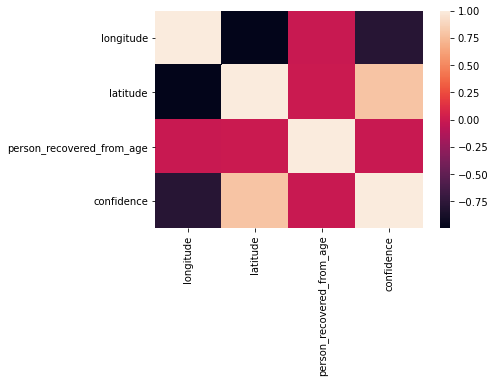

In [148]:
sns.heatmap(matrix)
plt.savefig('correlation_heatmap.png')

## Section 5: Exploring the Data

### 5.1 Looking at the incident categories

In [149]:
firearm_data_category = firearm_data[['ucr_category', 'incident_number']]

In [150]:
firearm_data_category = firearm_data_category.groupby(['ucr_category']).count()
firearm_data_category.columns = ["count_of_incidents"]
firearm_data_category_csv = firearm_data_category
firearm_data_category_csv.to_csv('firearm_data_category.csv')

In [151]:
firearm_data_category

,count_of_incidents
ucr_category,
Accidental_Shooting,62
Aggravated_Assault,1542
All_Other_Offenses,91
Auto_Theft,23
Bribery,14
Burglary,265
Counterfeiting,71
Death_Investigation,38
Disorderly_Conduct,6


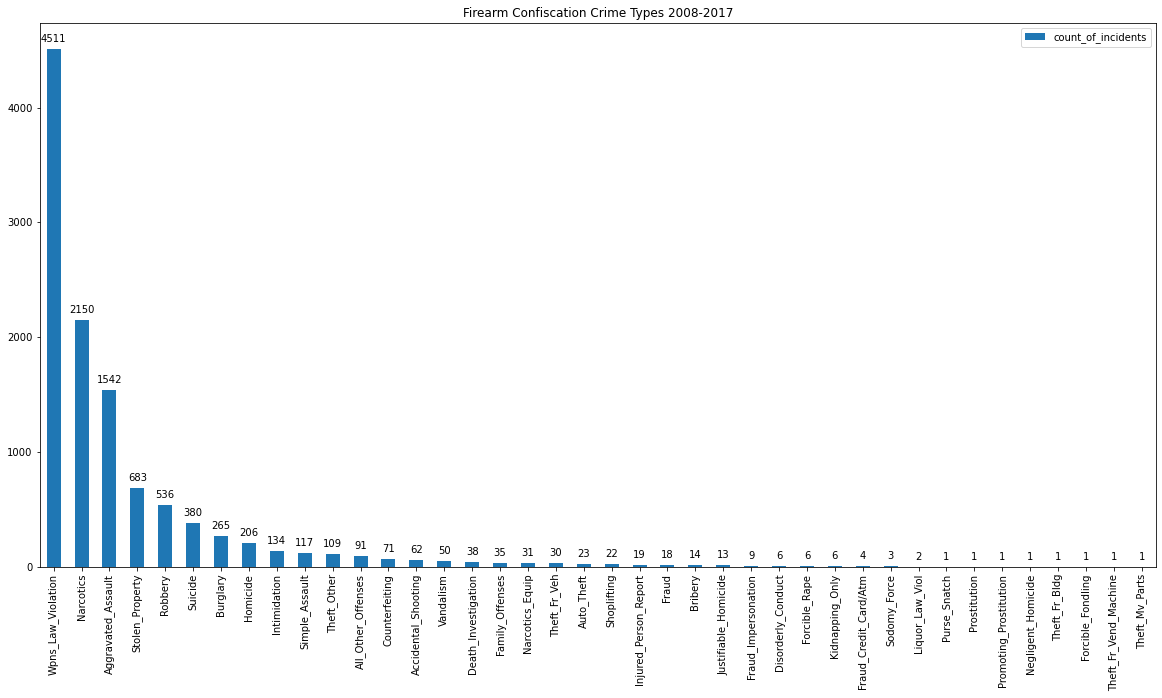

In [152]:
ax1 = firearm_data_category.sort_values(by=['count_of_incidents'], ascending = False).plot(kind='bar', xlabel='', title='Firearm Confiscation Crime Types 2008-2017', figsize = (20,10))
for p in ax1.patches:
    ax1.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('firearm_recovery_crime_category.png')

#### 5.1.1: Incident Categories Log

In [153]:
firearm_data_category_log = firearm_data_category
firearm_data_category_log['log_scale'] = np.log(firearm_data_category_log['count_of_incidents'])

In [154]:
firearm_data_category_log

,count_of_incidents,log_scale
ucr_category,,
Accidental_Shooting,62,4.127134
Aggravated_Assault,1542,7.340836
All_Other_Offenses,91,4.510860
Auto_Theft,23,3.135494
Bribery,14,2.639057
Burglary,265,5.579730
Counterfeiting,71,4.262680
Death_Investigation,38,3.637586
Disorderly_Conduct,6,1.791759


In [155]:
null_values_dropped = firearm_data_category_log[firearm_data_category_log['log_scale'] != 0]

In [156]:
null_values_dropped

,count_of_incidents,log_scale
ucr_category,,
Accidental_Shooting,62,4.127134
Aggravated_Assault,1542,7.340836
All_Other_Offenses,91,4.510860
Auto_Theft,23,3.135494
Bribery,14,2.639057
Burglary,265,5.579730
Counterfeiting,71,4.262680
Death_Investigation,38,3.637586
Disorderly_Conduct,6,1.791759


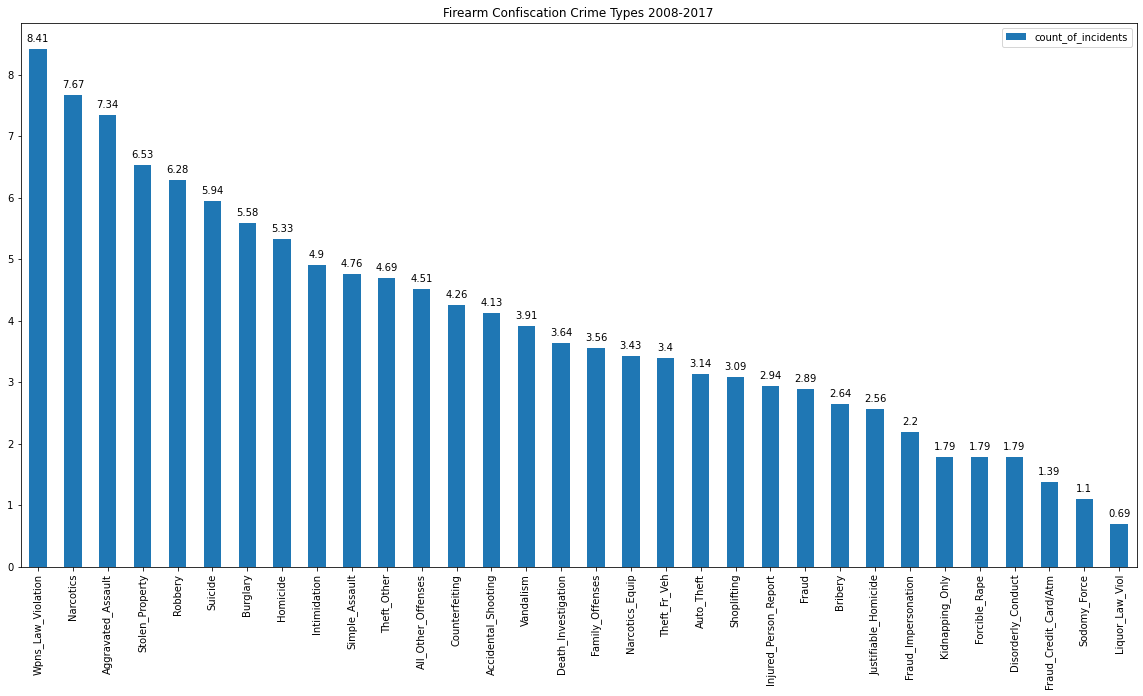

In [157]:
ax14 = null_values_dropped['log_scale'].sort_values(ascending = False).plot(kind='bar', xlabel='', title='Firearm Confiscation Crime Types 2008-2017', figsize = (20,10))
for p in ax14.patches:
    ax14.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('firearm_recovery_crime_category.png')

### 5.2: Looking at the gun categories

In [158]:
firearm_data_firearms = firearm_data[['firearm_category', 'firearm_subcategory']]
firearm_data_firearms['count_of_subcategory'] = firearm_data_firearms['firearm_subcategory']

<ipython-input-158-67d7c8b43dbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_firearms['count_of_subcategory'] = firearm_data_firearms['firearm_subcategory']


In [159]:
firearm_data_firearms_grouped = firearm_data_firearms.groupby([firearm_data_firearms['firearm_category'], firearm_data_firearms['firearm_subcategory']]).count()

In [160]:
firearm_data_firearms_grouped

count_of_subcategory
firearm_category firearm_subcategory                      
Pistol           Bolt_Action                             6
                 Derringer                              95
                 Flintlock                               1
                 Jet_Propelled                           8
                 Percussion                              2
                 Revolver                             1747
                 Semi-Automatic                       6220
                 Single-Shot                            33
Rifle            Automatic                              20
                 Bolt_Action                           168
                 Carbine                                20
                 Flintlock                               9
                 Lever_Action                           67
                 Percussion                             22
                 Pump_Action                            22
                 Semi-Automatic                        393
                 Single-Shot                           115
Shotgun          Bolt_Action                            37
                 Double_Barrel                          35
                 Over_And_Under                          6
                 Pump_Action                           370
                 Semi-Automatic                         55
                 Single-Shot                           196

#### Log Values

In [161]:
firearm_data_firearm_grouped_log = firearm_data_firearms_grouped
firearm_data_firearm_grouped_log['log_scale'] = np.log(firearm_data_firearm_grouped_log)

In [162]:
firearm_data_firearm_grouped_log

count_of_subcategory  log_scale
firearm_category firearm_subcategory                                 
Pistol           Bolt_Action                             6   1.791759
                 Derringer                              95   4.553877
                 Flintlock                               1   0.000000
                 Jet_Propelled                           8   2.079442
                 Percussion                              2   0.693147
                 Revolver                             1747   7.465655
                 Semi-Automatic                       6220   8.735525
                 Single-Shot                            33   3.496508
Rifle            Automatic                              20   2.995732
                 Bolt_Action                           168   5.123964
                 Carbine                                20   2.995732
                 Flintlock                               9   2.197225
                 Lever_Action                           67   4.204693
                 Percussion                             22   3.091042
                 Pump_Action                            22   3.091042
                 Semi-Automatic                        393   5.973810
                 Single-Shot                           115   4.744932
Shotgun          Bolt_Action                            37   3.610918
                 Double_Barrel                          35   3.555348
                 Over_And_Under                          6   1.791759
                 Pump_Action                           370   5.913503
                 Semi-Automatic                         55   4.007333
                 Single-Shot                           196   5.278115

In [163]:
data_sorted_guntype = firearm_data_firearms_grouped.sort_values(by=['count_of_subcategory']).head(15)

In [164]:
data_sorted_guntype

count_of_subcategory  log_scale
firearm_category firearm_subcategory                                 
Pistol           Flintlock                               1   0.000000
                 Percussion                              2   0.693147
                 Bolt_Action                             6   1.791759
Shotgun          Over_And_Under                          6   1.791759
Pistol           Jet_Propelled                           8   2.079442
Rifle            Flintlock                               9   2.197225
                 Automatic                              20   2.995732
                 Carbine                                20   2.995732
                 Pump_Action                            22   3.091042
                 Percussion                             22   3.091042
Pistol           Single-Shot                            33   3.496508
Shotgun          Double_Barrel                          35   3.555348
                 Bolt_Action                            37   3.610918
                 Semi-Automatic                         55   4.007333
Rifle            Lever_Action                           67   4.204693

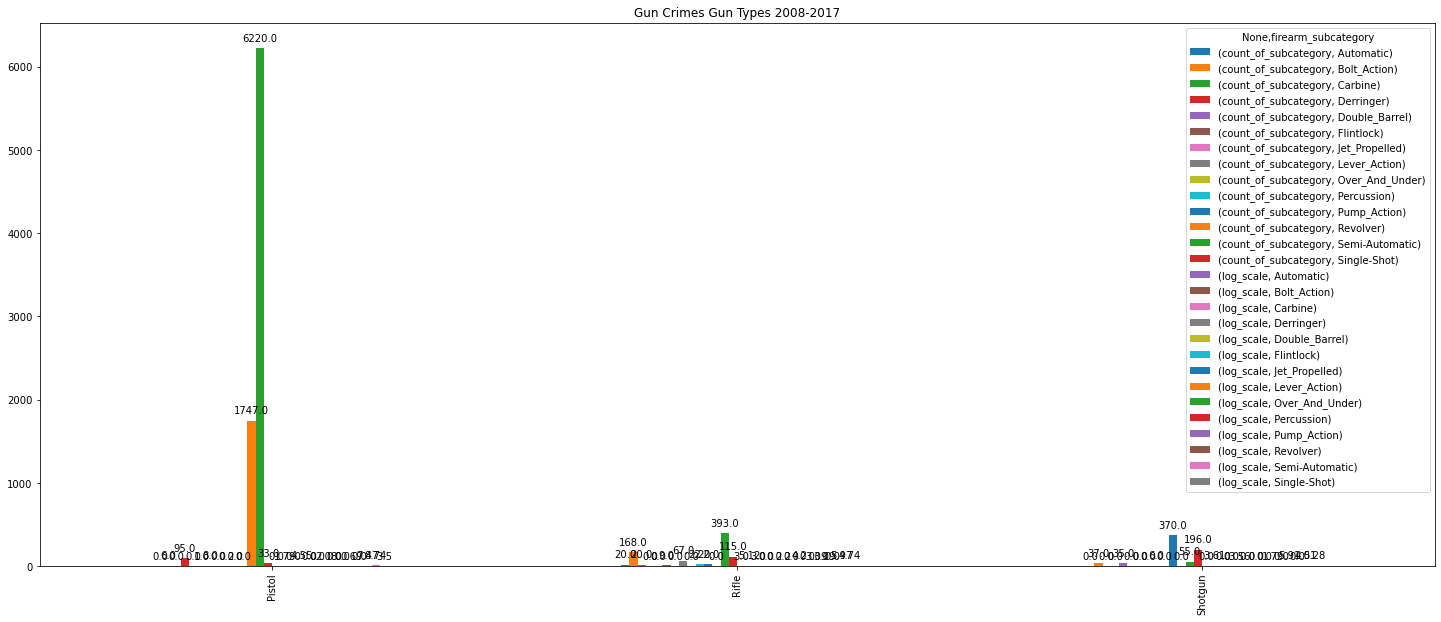

In [165]:
ax8 = firearm_data_firearms_grouped.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Gun Types 2008-2017', figsize = (25,10))
for p in ax8.patches:
    ax8.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('firearm_unstacked.png')

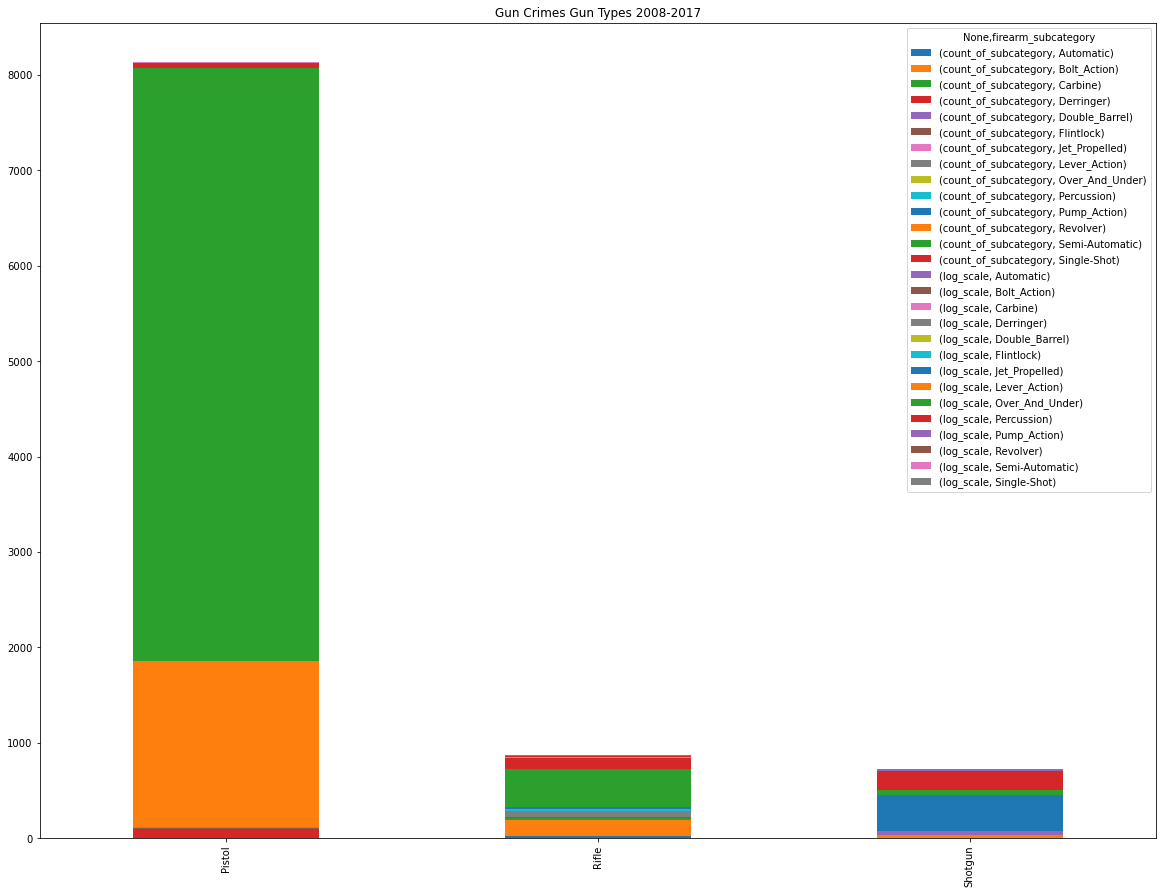

In [166]:
ax9 = firearm_data_firearms_grouped.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Gun Types 2008-2017', figsize = (20,15), stacked = True)
plt.savefig('firearm_stacked.png')

In [167]:
firearm_data_firearms_subcategory = firearm_data_firearms_grouped.reset_index('firearm_category')

In [168]:
firearm_data_firearms_subcategory = firearm_data_firearms_subcategory.sort_values(by=['count_of_subcategory'], ascending = False)

In [169]:
firearm_data_firearms_subcategory

,firearm_category,count_of_subcategory,log_scale
firearm_subcategory,,,
Semi-Automatic,Pistol,6220,8.735525
Revolver,Pistol,1747,7.465655
Semi-Automatic,Rifle,393,5.973810
Pump_Action,Shotgun,370,5.913503
Single-Shot,Shotgun,196,5.278115
Bolt_Action,Rifle,168,5.123964
Single-Shot,Rifle,115,4.744932
Derringer,Pistol,95,4.553877
Lever_Action,Rifle,67,4.204693


In [170]:
colors = {"Pistol" : "plum", "Rifle" : "gold", "Shotgun" : "r"}

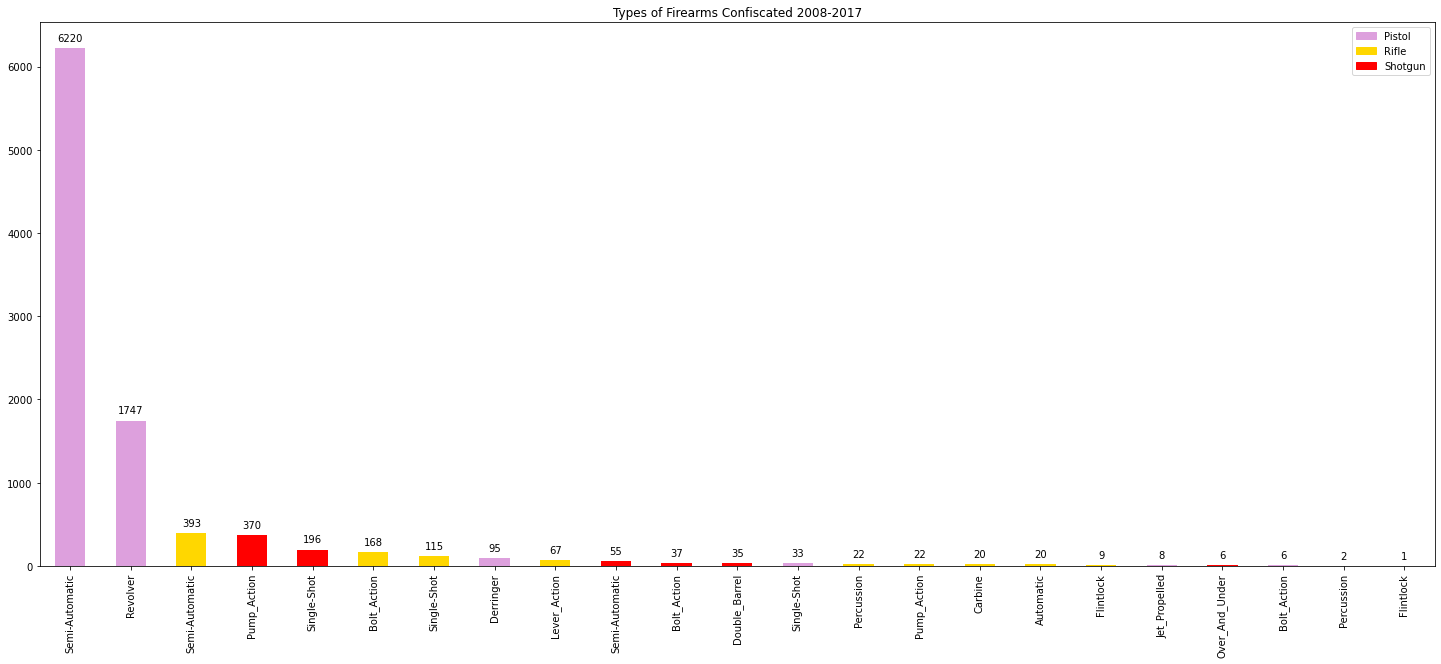

In [171]:
ax2 = firearm_data_firearms_subcategory['count_of_subcategory'].plot(kind='bar', xlabel='', title='Types of Firearms Confiscated 2008-2017', figsize = (25,10), color = firearm_data_firearms_subcategory['firearm_category'].replace(colors))
for p in ax2.patches:
    ax2.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
pistol_label = mpatch.Patch(color = 'plum', label = "Pistol")
rifle_label = mpatch.Patch(color = 'gold', label = "Rifle")
shotgun_label = mpatch.Patch(color = 'r', label = "Shotgun")
plt.legend(handles=[pistol_label, rifle_label, shotgun_label], loc = 1)
plt.savefig('count_firearm_type.png')

#### 5.2.1: Gun Category with Log Values

In [172]:
firearm_data_firearm_grouped_log = firearm_data_firearms_grouped
firearm_data_firearm_grouped_log['log_scale'] = np.log(firearm_data_firearm_grouped_log)

<ipython-input-172-5fdafe75a14c>:2: RuntimeWarning: divide by zero encountered in log
  firearm_data_firearm_grouped_log['log_scale'] = np.log(firearm_data_firearm_grouped_log)


In [173]:
firearm_data_firearm_grouped_log

count_of_subcategory  log_scale
firearm_category firearm_subcategory                                 
Pistol           Bolt_Action                             6   1.791759
                 Derringer                              95   4.553877
                 Flintlock                               1   0.000000
                 Jet_Propelled                           8   2.079442
                 Percussion                              2   0.693147
                 Revolver                             1747   7.465655
                 Semi-Automatic                       6220   8.735525
                 Single-Shot                            33   3.496508
Rifle            Automatic                              20   2.995732
                 Bolt_Action                           168   5.123964
                 Carbine                                20   2.995732
                 Flintlock                               9   2.197225
                 Lever_Action                           67   4.204693
                 Percussion                             22   3.091042
                 Pump_Action                            22   3.091042
                 Semi-Automatic                        393   5.973810
                 Single-Shot                           115   4.744932
Shotgun          Bolt_Action                            37   3.610918
                 Double_Barrel                          35   3.555348
                 Over_And_Under                          6   1.791759
                 Pump_Action                           370   5.913503
                 Semi-Automatic                         55   4.007333
                 Single-Shot                           196   5.278115

In [174]:
value_firearm_grouped_log = firearm_data_firearm_grouped_log[firearm_data_firearm_grouped_log['log_scale'] != 0]

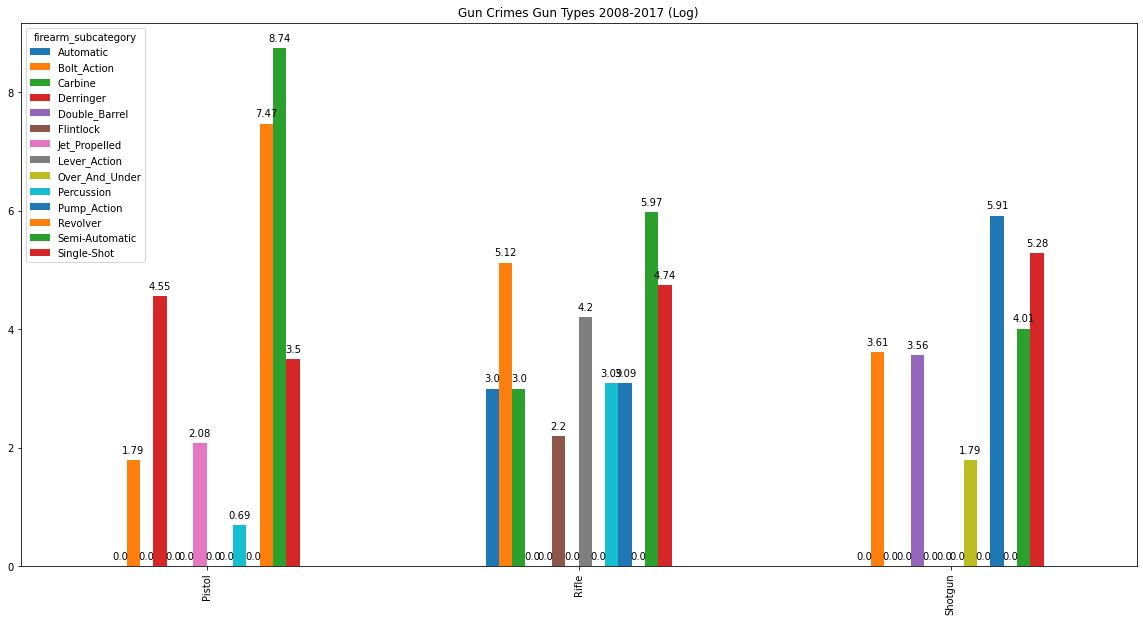

In [175]:
ax15 = value_firearm_grouped_log['log_scale'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Gun Types 2008-2017 (Log)', figsize = (20,10))
for p in ax15.patches:
    ax15.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('unstacked_gun_crime_types_log')

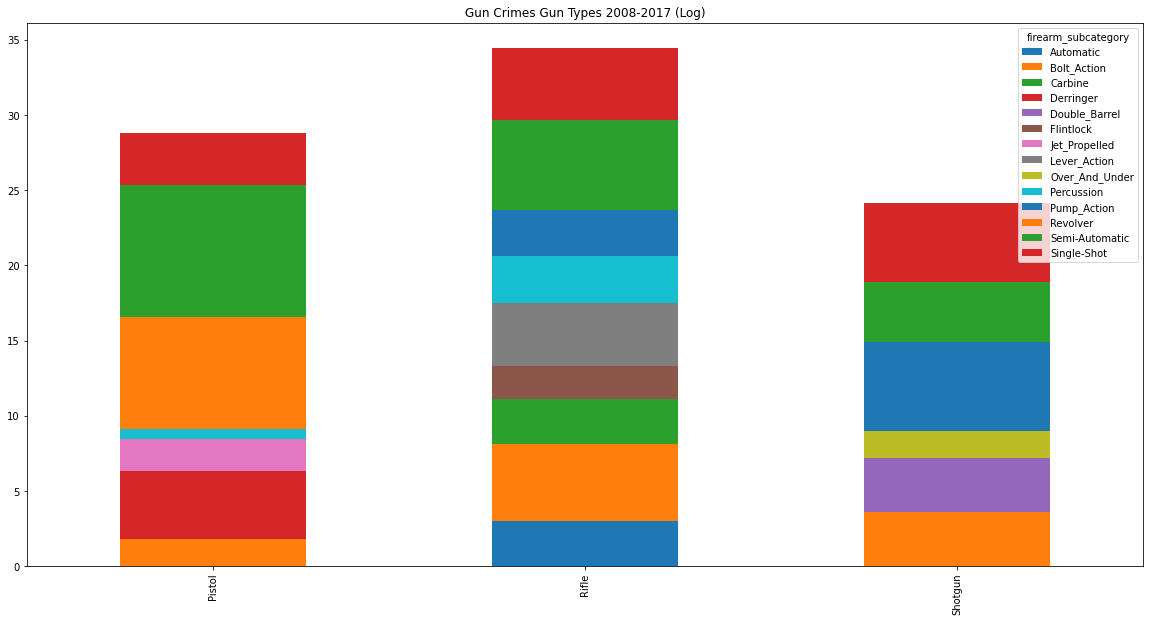

In [176]:
ax16 = value_firearm_grouped_log['log_scale'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Gun Types 2008-2017 (Log)', figsize = (20,10), stacked = True)
plt.savefig('stacked_gun_crime_types_log')

In [177]:
firearm_data_subcategory_log = firearm_data_firearm_grouped_log.reset_index('firearm_category')

In [178]:
firearm_data_subcategory_log = firearm_data_subcategory_log.sort_values(by=['count_of_subcategory'], ascending = False)
firearm_data_subcategory_log = firearm_data_subcategory_log[firearm_data_subcategory_log['log_scale'] != 0]

In [179]:
firearm_data_subcategory_log

,firearm_category,count_of_subcategory,log_scale
firearm_subcategory,,,
Semi-Automatic,Pistol,6220,8.735525
Revolver,Pistol,1747,7.465655
Semi-Automatic,Rifle,393,5.973810
Pump_Action,Shotgun,370,5.913503
Single-Shot,Shotgun,196,5.278115
Bolt_Action,Rifle,168,5.123964
Single-Shot,Rifle,115,4.744932
Derringer,Pistol,95,4.553877
Lever_Action,Rifle,67,4.204693


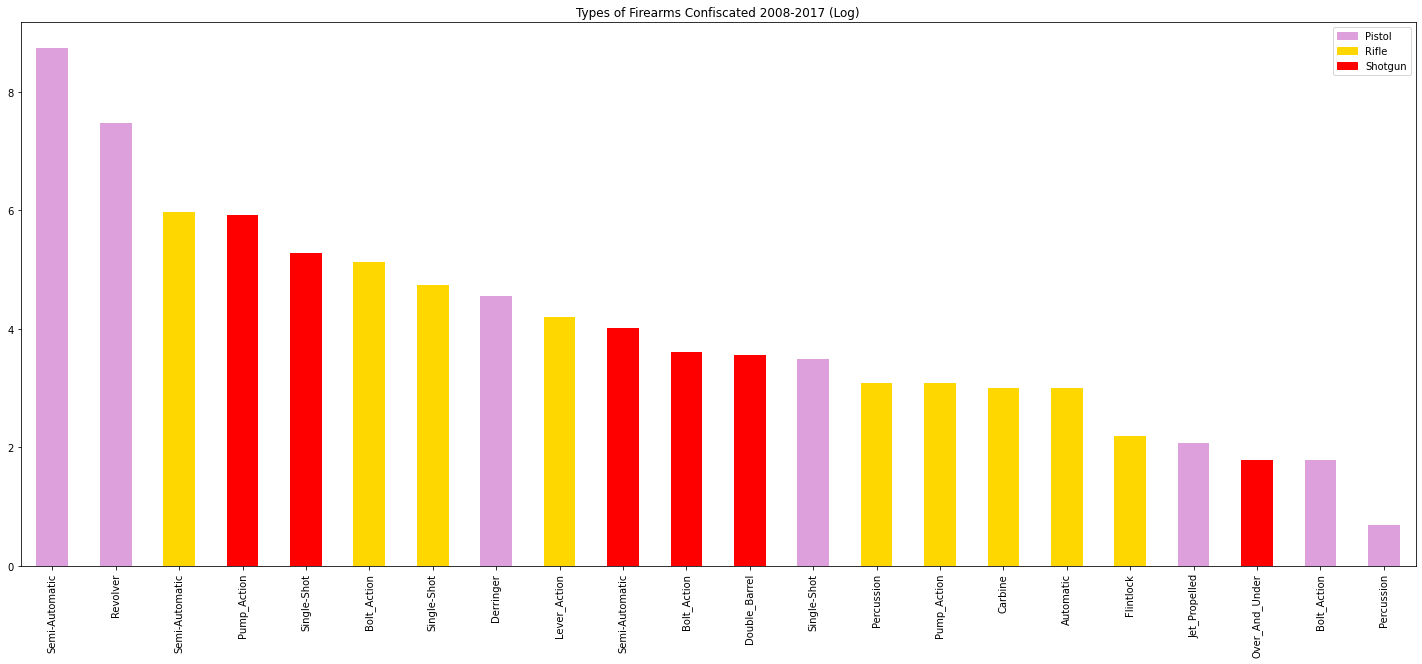

In [180]:
ax17 = firearm_data_subcategory_log['log_scale'].plot(kind='bar', xlabel='', title='Types of Firearms Confiscated 2008-2017 (Log)', figsize = (25,10), color = firearm_data_subcategory_log['firearm_category'].replace(colors))
for p in ax2.patches:
    ax2.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
pistol_label = mpatch.Patch(color = 'plum', label = "Pistol")
rifle_label = mpatch.Patch(color = 'gold', label = "Rifle")
shotgun_label = mpatch.Patch(color = 'r', label = "Shotgun")
plt.legend(handles=[pistol_label, rifle_label, shotgun_label], loc = 1)
plt.savefig('count_firearm_type_log.png')

### 5.3: Looking at the crimes in each zipcode

In [181]:
firearm_data_zipcode = firearm_data[['zipcode', 'incident_number']]

In [182]:
firearm_data_zipcode.columns = ['zipcode', 'count_of_incidents']

In [183]:
firearm_data_zipcode = firearm_data_zipcode.groupby(['zipcode']).count()

In [184]:
firearm_data_zipcode

,count_of_incidents
zipcode,
40023,10
40056,5
40058,1
40059,7
40118,125
40165,1
40177,1
40202,2194
40203,871


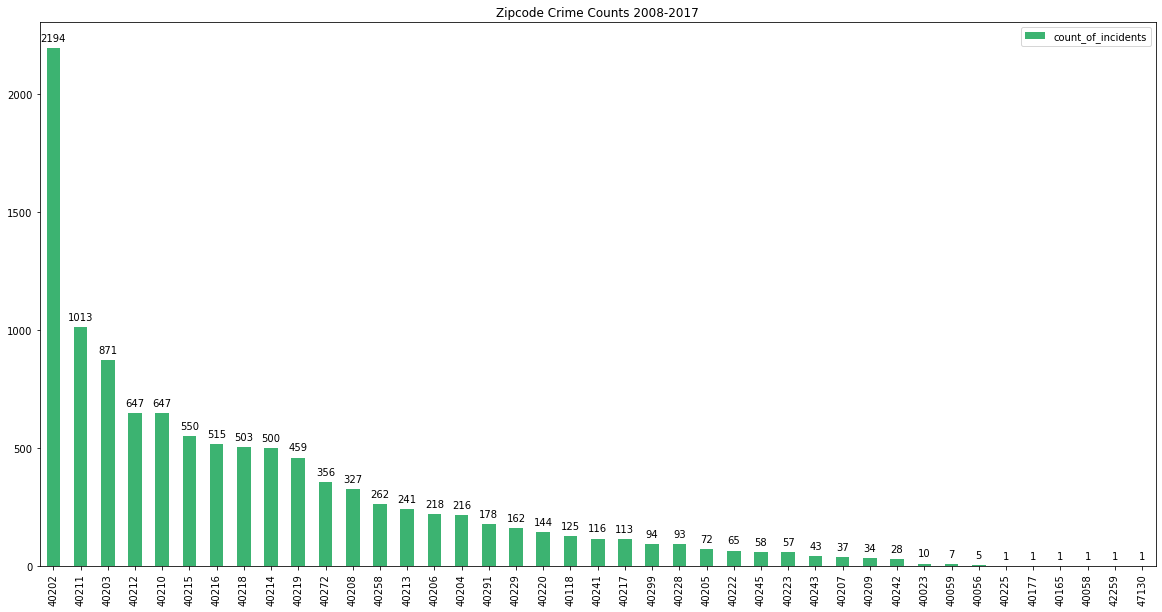

In [185]:
ax3 = firearm_data_zipcode.sort_values(by=['count_of_incidents'], ascending = False).plot(kind='bar', xlabel='', title='Zipcode Crime Counts 2008-2017', figsize = (20,10), color = 'mediumseagreen')
for p in ax3.patches:
    ax3.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('firearm_crime_zipcode.png')

#### 5.3.1 Crimes in Zipcode with Log Values

In [186]:
firearm_data_zipcode_log = firearm_data_zipcode
firearm_data_zipcode_log['log_values'] = np.log(firearm_data_zipcode['count_of_incidents'])
firearm_data_zipcode_log = firearm_data_zipcode_log[firearm_data_zipcode_log['log_values']!= 0]

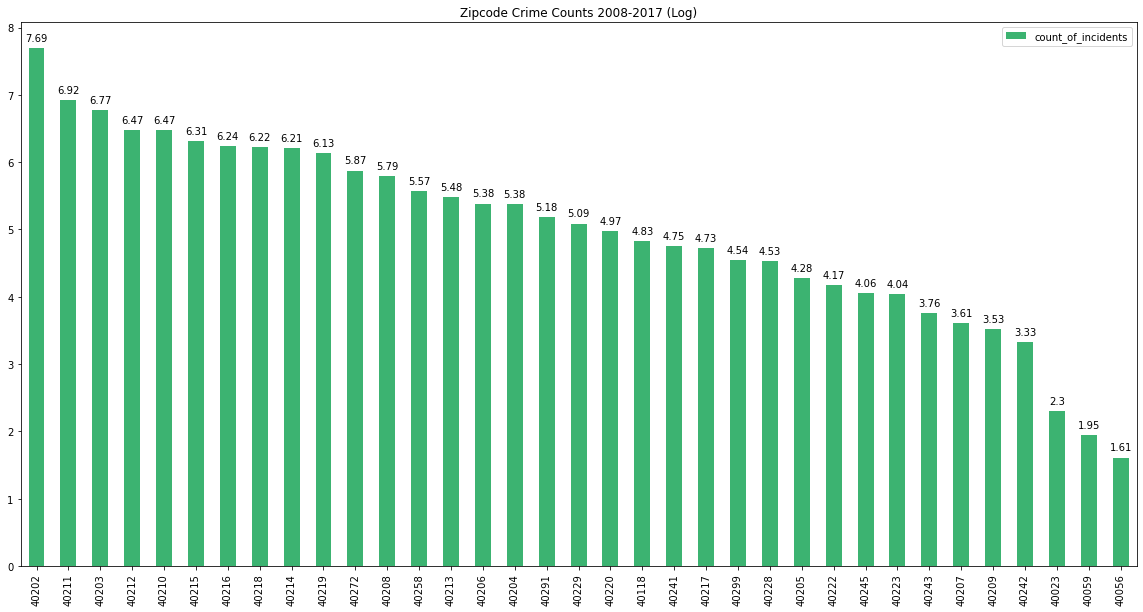

In [187]:
ax18 = firearm_data_zipcode_log['log_values'].sort_values(ascending = False).plot(kind='bar', xlabel='', title='Zipcode Crime Counts 2008-2017 (Log)', figsize = (20,10), color = 'mediumseagreen')
for p in ax18.patches:
    ax18.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('firearm_crime_zipcode_log.png')

### 5.4: Counts of Crime per Race

In [188]:
firearm_data_race = firearm_data[['person_recovered_from_race', 'incident_number']]
firearm_data_race.columns = ['person_recovered_from_race', 'number_of_incidents']

In [189]:
firearm_data_race = firearm_data_race.groupby(['person_recovered_from_race']).count()

In [190]:
firearm_data_race

,number_of_incidents
person_recovered_from_race,
Asian,32
Black,5759
Hispanic,153
Indian/Burmese_Indian,2
Middle_Eastern,6
Native_American,5
White,3199


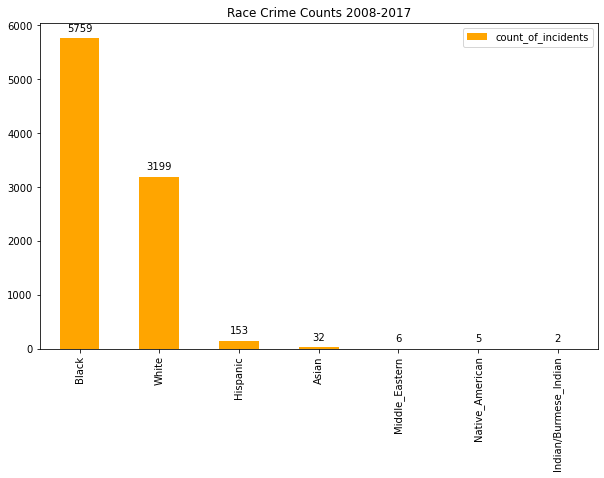

In [191]:
ax4 = firearm_data_race.sort_values(by=['number_of_incidents'], ascending = False).plot(kind='bar', xlabel='', title='Race Crime Counts 2008-2017', figsize = (10,6), color = 'orange')
for p in ax4.patches:
    ax4.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('firearm_crime_race.png')

#### 5.4.1: Crime per Race with Log Values

In [192]:
firearm_data_race_log = firearm_data_race
firearm_data_race_log['log_values'] = np.log(firearm_data_race['number_of_incidents'])
firearm_data_race_log = firearm_data_race_log[firearm_data_race_log['log_values']!= 0]

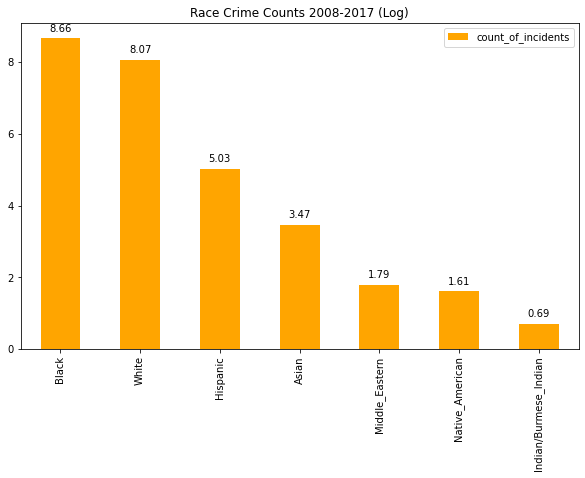

In [193]:
ax19 = firearm_data_race_log['log_values'].sort_values(ascending = False).plot(kind='bar', xlabel='', title='Race Crime Counts 2008-2017 (Log)', figsize = (10,6), color = 'orange')
for p in ax19.patches:
    ax19.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('firearm_crime_race_log.png')

### 5.5: Counts of Crime per Sex

In [194]:
firearm_data_sex = firearm_data[['person_recovered_from_sex', 'incident_number']]

In [195]:
firearm_data_sex = firearm_data_sex.groupby(['person_recovered_from_sex']).count()

In [196]:
firearm_data_sex

,incident_number
person_recovered_from_sex,
F,644
M,8552


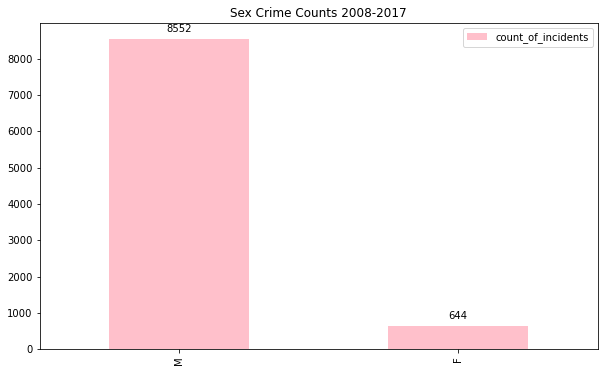

In [197]:
ax5 = firearm_data_sex.sort_values(by=['incident_number'], ascending = False).plot(kind='bar', xlabel='', title='Sex Crime Counts 2008-2017', figsize = (10,6), color = 'pink')
for p in ax5.patches:
    ax5.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('firearm_crime_sex.png')

In [198]:
firearm_data

,incident_number,year,recovery_date,ucr_category,firearm_category,firearm_subcategory,firearm_manufacturer,firearm_model,firearm_caliber,address_geocode_type,...,street_address,city,state,zipcode,longitude,latitude,person_recovered_from_race,person_recovered_from_sex,person_recovered_from_age,confidence
0,80-06-008380,NaN,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
1,80-10-002211,NaN,NaT,Homicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40202,0.000000,0.000000,NaN,NaN,NaN,0.00
2,80-17-000578,NaN,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
3,80-17-001680,NaN,NaT,Suicide,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40272,0.000000,0.000000,NaN,NaN,NaN,0.00
4,80-17-002802,NaN,NaT,Death_Investigation,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Louisville,KY,40211,0.000000,0.000000,NaN,NaN,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23650,80-10-000185,2010,2010-01-01,Narcotics,Rifle,Automatic,Remington_Arms,597,22C,BLOCK,...,9200_Sissonne_Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23653,80-10-000185,2010,2010-01-01,Narcotics,Pistol,Semi-Automatic,Smith_&_Wesson,Sw40Ve,40C,BLOCK,...,9200_Sissonne_Dr,Louisville,KY,40118,-85.769370,38.117737,White,M,27.0,1.00
23656,80-09-098505,2009,2009-12-29,Aggravated_Assault,NaN,NaN,Armory_Gun_Co.,NaN,NaN,BLOCK,...,400_Amy_Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00
23658,80-09-098505,2009,2009-12-29,Aggravated_Assault,NaN,NaN,NaN,NaN,NaN,BLOCK,...,400_Amy_Ave,Louisville,KY,40212,-85.813555,38.259416,Black,M,56.0,1.00


### 5.6: Counts of Crimes per Age

In [199]:
firearm_data_age = firearm_data[['person_recovered_from_age', 'incident_number']]

In [200]:
firearm_data_age = firearm_data_age.groupby(['person_recovered_from_age']).count()

In [201]:
firearm_data_age

,incident_number
person_recovered_from_age,
0.0,2
9.0,1
11.0,3
12.0,9
13.0,15
...,...
80.0,1
82.0,1
83.0,3


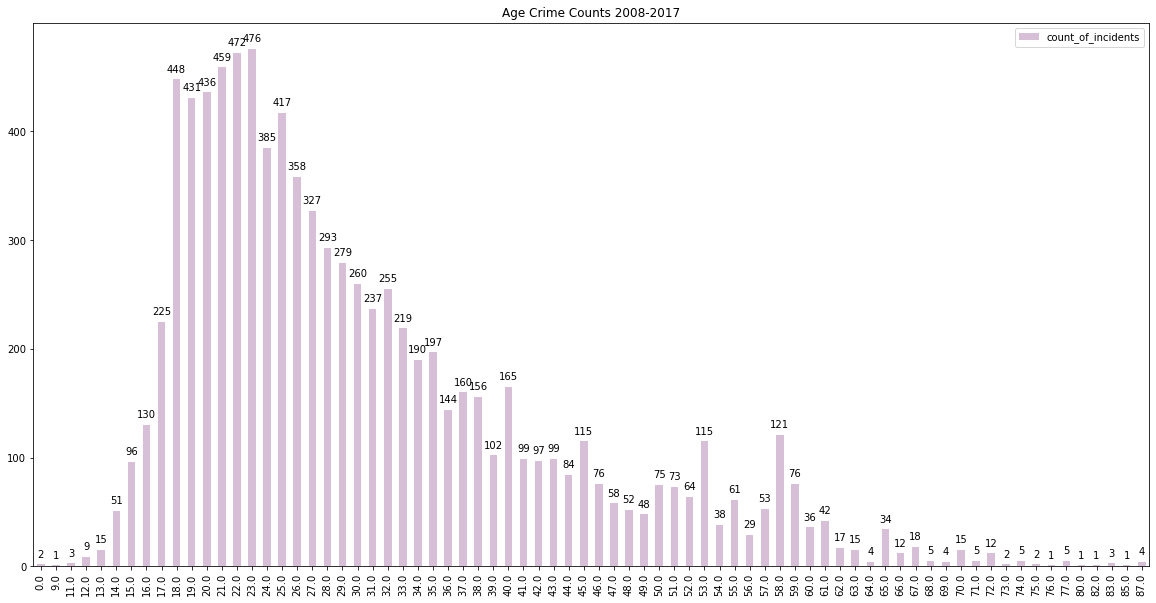

In [202]:
ax6 = firearm_data_age.plot(kind='bar', xlabel='', title='Age Crime Counts 2008-2017', figsize = (20,10), color = 'thistle')
for p in ax6.patches:
    ax6.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
legend = plt.legend()
legend.get_texts()[0].set_text('count_of_incidents')
plt.savefig('firearm_crime_age.png')

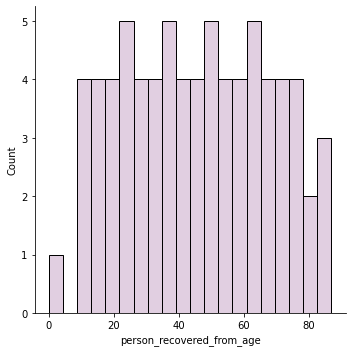

In [203]:
sns.displot(firearm_data_age.index, color='thistle', bins=20)

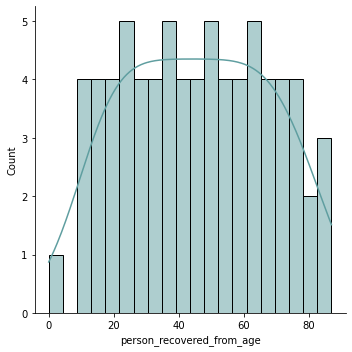

In [204]:
sns.displot(firearm_data_age.index, color='cadetblue', kde = True, bins = 20)
plt.savefig('age_density.png')

### 5.7: Grouping Zipcode and Sex

In [205]:
firearm_data_zip_sex = firearm_data[['zipcode', 'person_recovered_from_sex']]
firearm_data_zip_sex['count_of_crimes'] = firearm_data_zip_sex['person_recovered_from_sex']

<ipython-input-205-edbec57d1383>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_zip_sex['count_of_crimes'] = firearm_data_zip_sex['person_recovered_from_sex']


In [206]:
firearm_data_zip_sex = firearm_data_zip_sex.groupby([firearm_data_zip_sex['zipcode'], firearm_data_zip_sex['person_recovered_from_sex']]).count()

In [207]:
firearm_data_zip_sex

count_of_crimes
zipcode person_recovered_from_sex                 
40023   M                                       10
40056   M                                        4
40059   M                                        4
40118   F                                        9
        M                                      101
...                                            ...
40272   M                                      277
40291   F                                       17
        M                                      121
40299   M                                       79
42259   M                                        1

[67 rows x 1 columns]

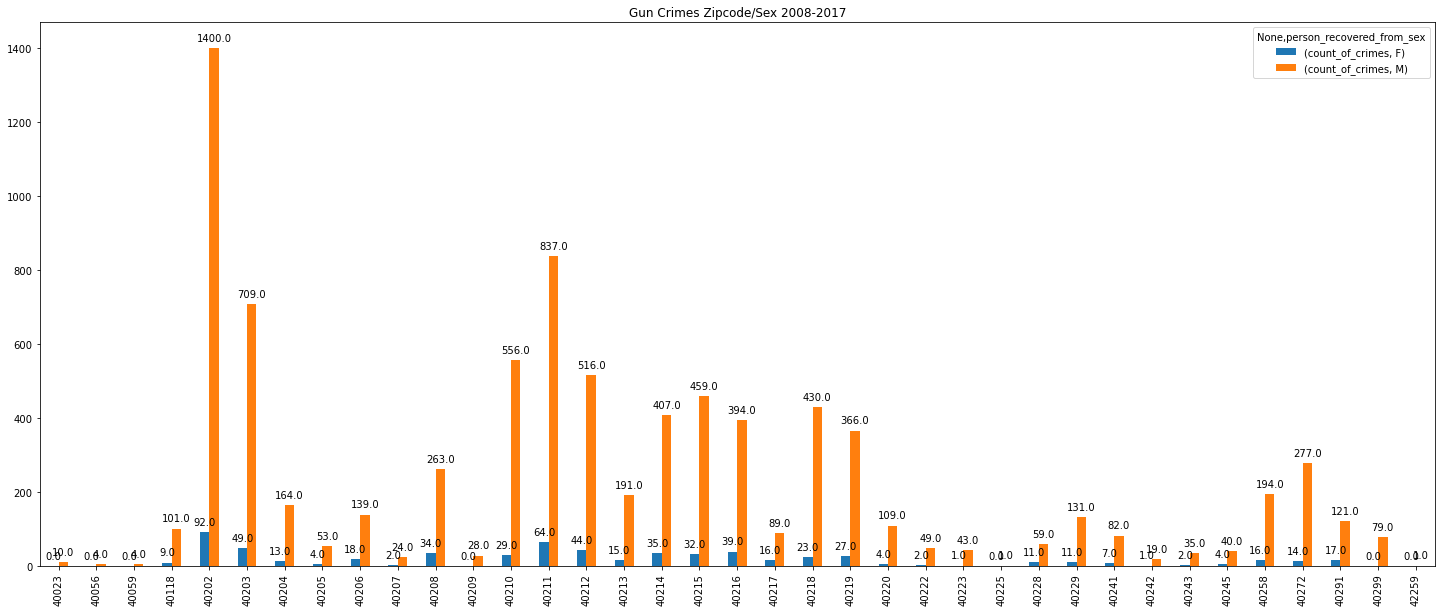

In [208]:
ax7 = firearm_data_zip_sex.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Zipcode/Sex 2008-2017', figsize = (25,10))
for p in ax7.patches:
    ax7.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('count_zip_sex_crime.png')

#### 5.7.1: Zipcode and Sex with Log Values

In [209]:
firearm_data_zip_sex_log = firearm_data_zip_sex
firearm_data_zip_sex_log['log_values'] = np.log(firearm_data_zip_sex_log['count_of_crimes'])
firearm_data_zip_sex_log = firearm_data_zip_sex_log[firearm_data_zip_sex_log['log_values'] != 0]

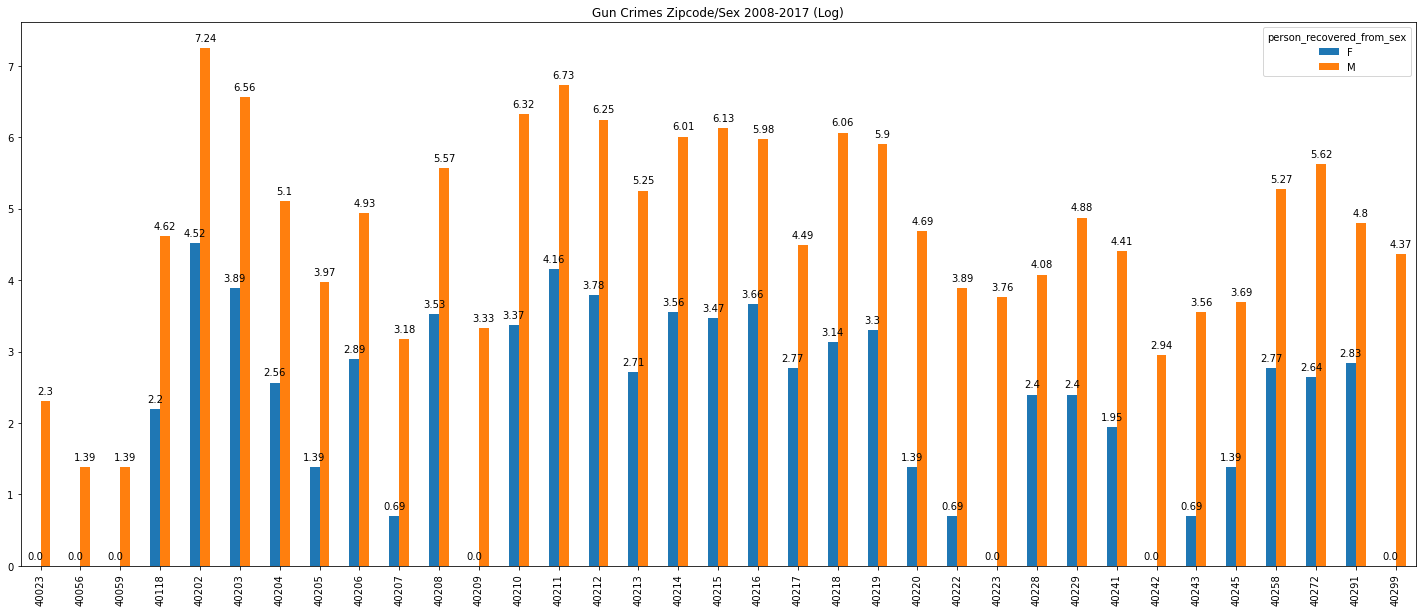

In [210]:
ax20 = firearm_data_zip_sex_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Zipcode/Sex 2008-2017 (Log)', figsize = (25,10))
for p in ax20.patches:
    ax20.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('count_zip_sex_crime_log.png')

### 5.8: Grouping Zipcode and Race

In [211]:
firearm_data_zip_race = firearm_data[['zipcode', 'person_recovered_from_race']]
firearm_data_zip_race['count_of_crimes'] = firearm_data_zip_race['person_recovered_from_race']

<ipython-input-211-346e36c305fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_zip_race['count_of_crimes'] = firearm_data_zip_race['person_recovered_from_race']


In [212]:
firearm_data_zip_race = firearm_data_zip_race.groupby([firearm_data_zip_race['zipcode'], firearm_data_zip_race['person_recovered_from_race']]).count()

In [213]:
firearm_data_zip_race

count_of_crimes
zipcode person_recovered_from_race                 
40023   Black                                     2
        Hispanic                                  2
        White                                     6
40056   Black                                     4
40059   Black                                     1
...                                             ...
40291   Middle_Eastern                            1
        White                                    92
40299   Black                                     8
        White                                    69
42259   White                                     1

[114 rows x 1 columns]

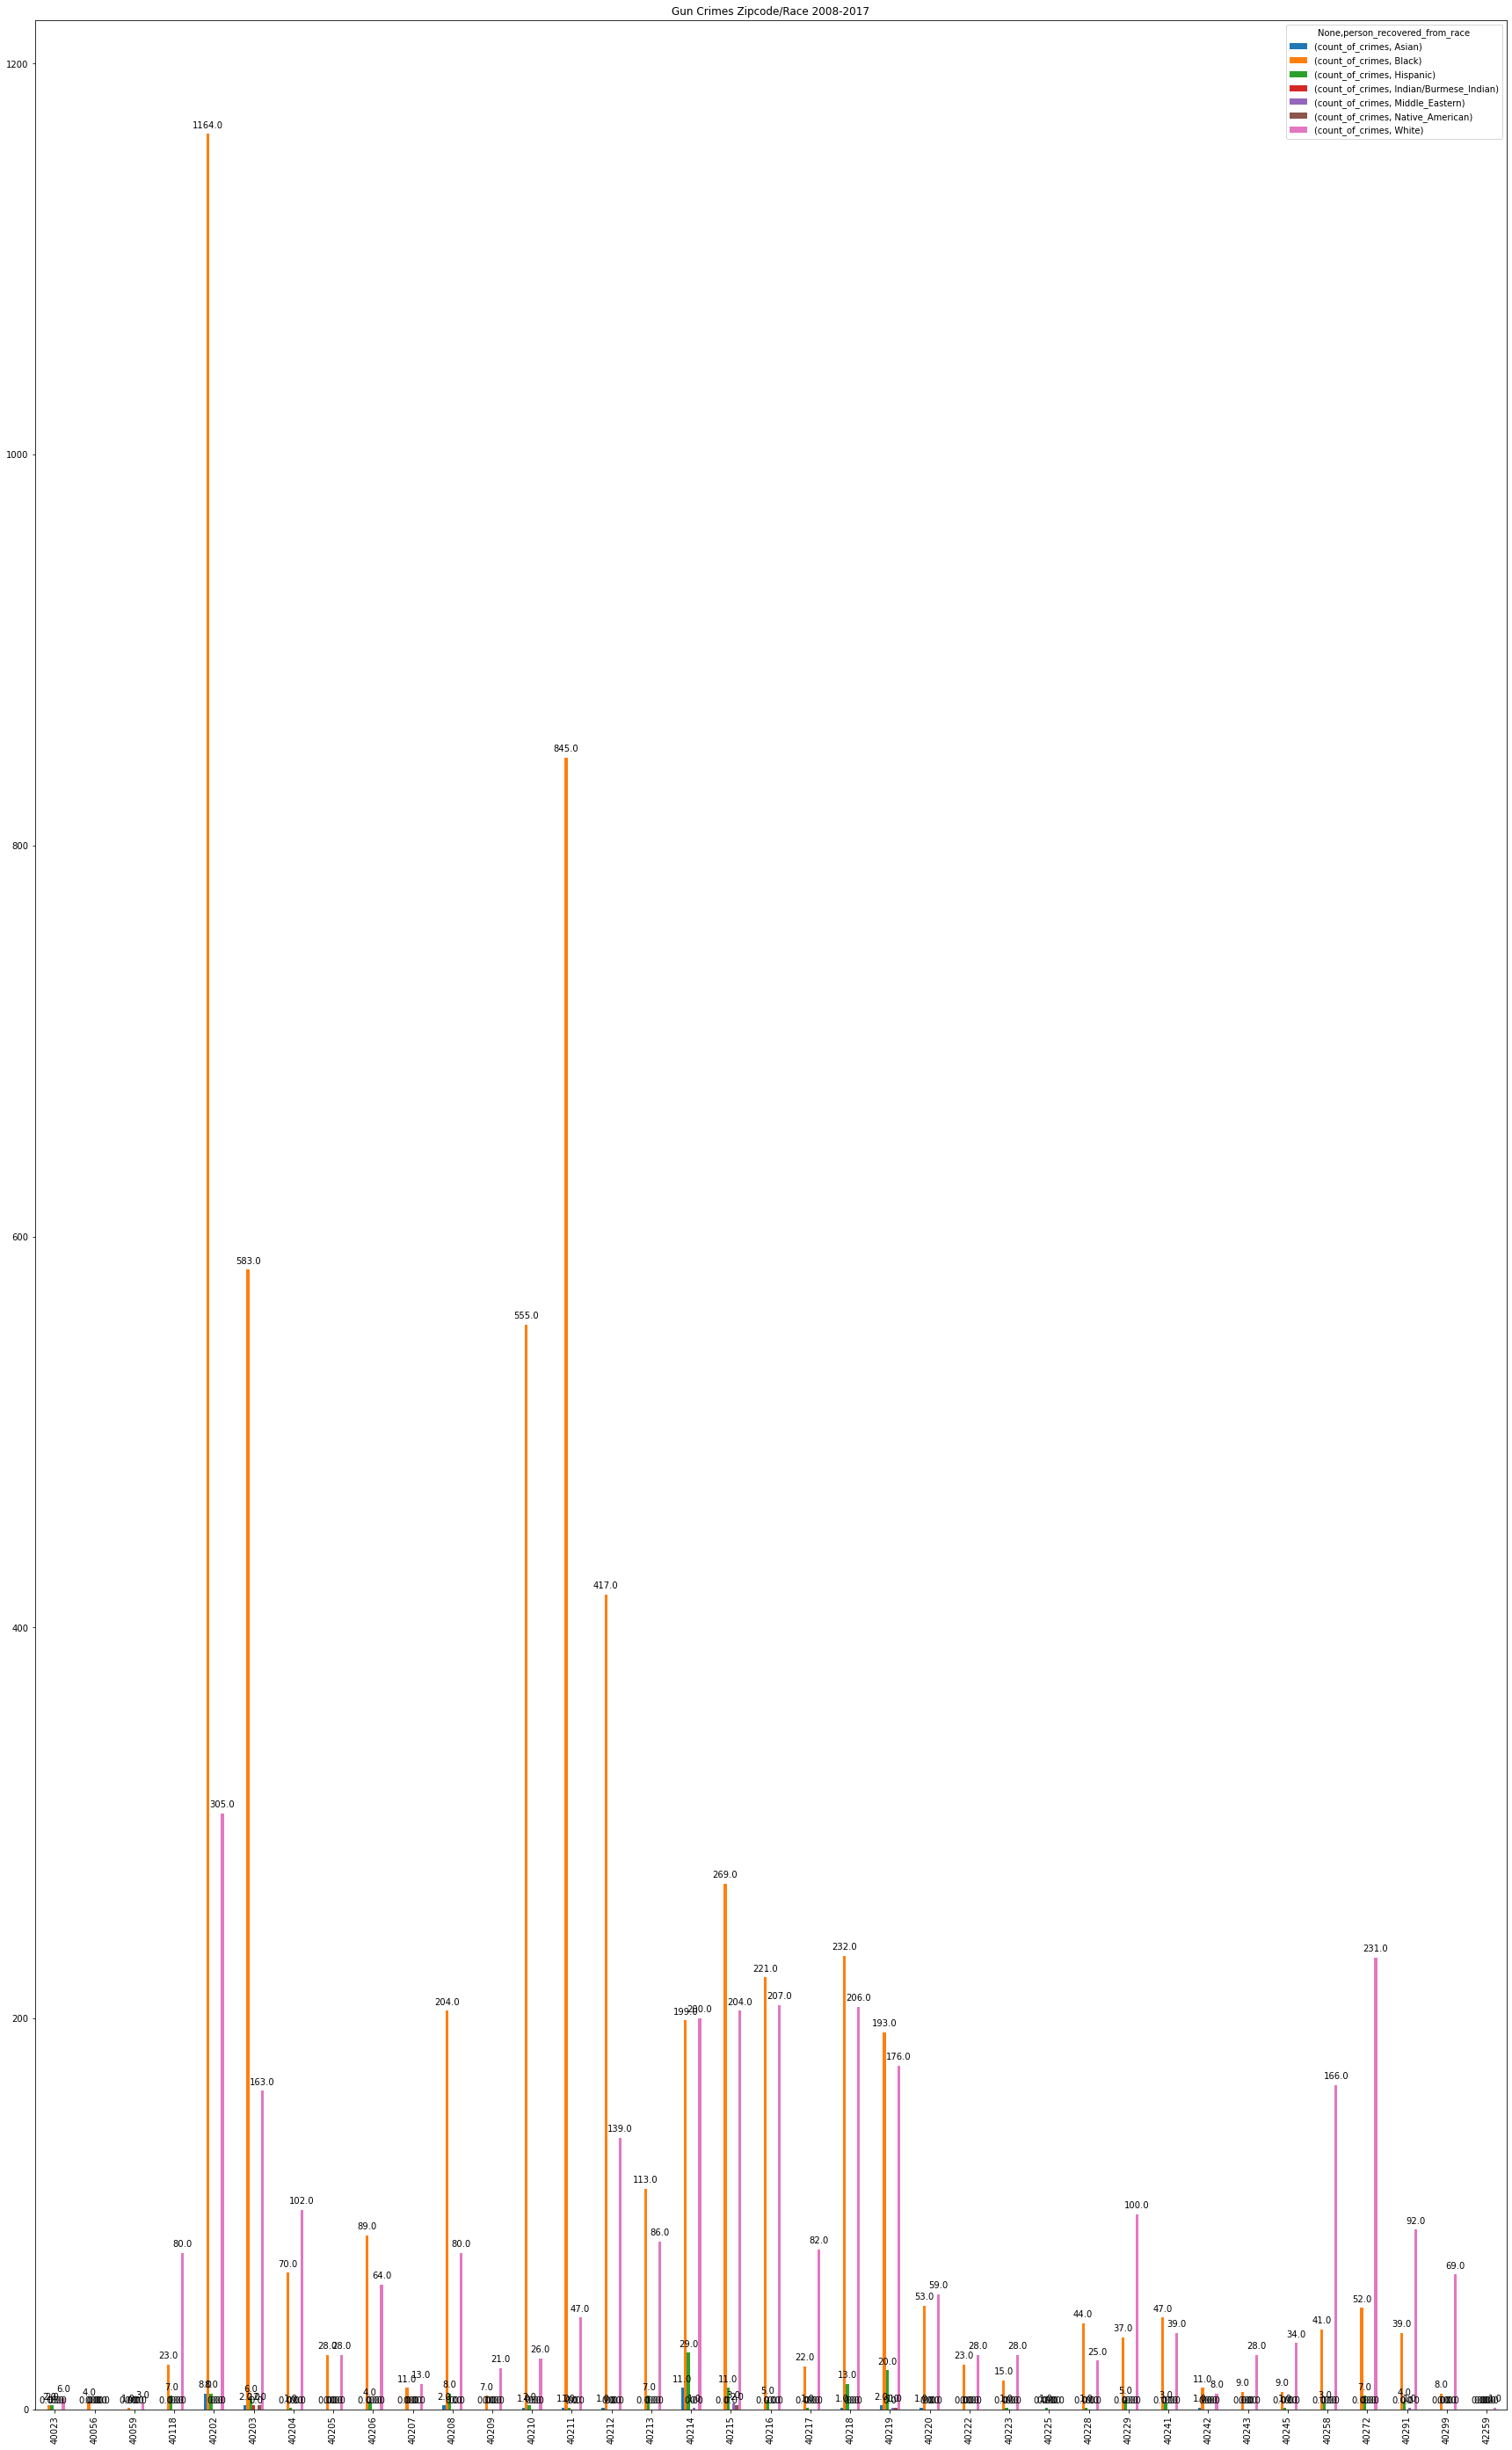

In [214]:
ax10 = firearm_data_zip_race.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Zipcode/Race 2008-2017', figsize = (30,50))
for p in ax10.patches:
    ax10.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('count_zip_race_crime.png')

#### 5.8.1: Zipcode and Race with Log Values

In [215]:
firearm_data_zip_race_log = firearm_data_zip_race
firearm_data_zip_race_log['log_values'] = np.log(firearm_data_zip_race_log['count_of_crimes'])
firearm_data_zip_race_log_zero = firearm_data_zip_race_log[firearm_data_zip_race_log['log_values'] != 0]

In [216]:
firearm_data_zip_race_log_zero.index

MultiIndex([('40023',                 'Black'),
            ('40023',              'Hispanic'),
            ('40023',                 'White'),
            ('40056',                 'Black'),
            ('40059',                 'White'),
            ('40118',                 'Black'),
            ('40118',              'Hispanic'),
            ('40118',                 'White'),
            ('40202',                 'Asian'),
            ('40202',                 'Black'),
            ('40202',              'Hispanic'),
            ('40202',                 'White'),
            ('40203',                 'Asian'),
            ('40203',                 'Black'),
            ('40203',              'Hispanic'),
            ('40203', 'Indian/Burmese_Indian'),
            ('40203',       'Native_American'),
            ('40203',                 'White'),
            ('40204',                 'Black'),
            ('40204',                 'White'),
            ('40205',                 'B

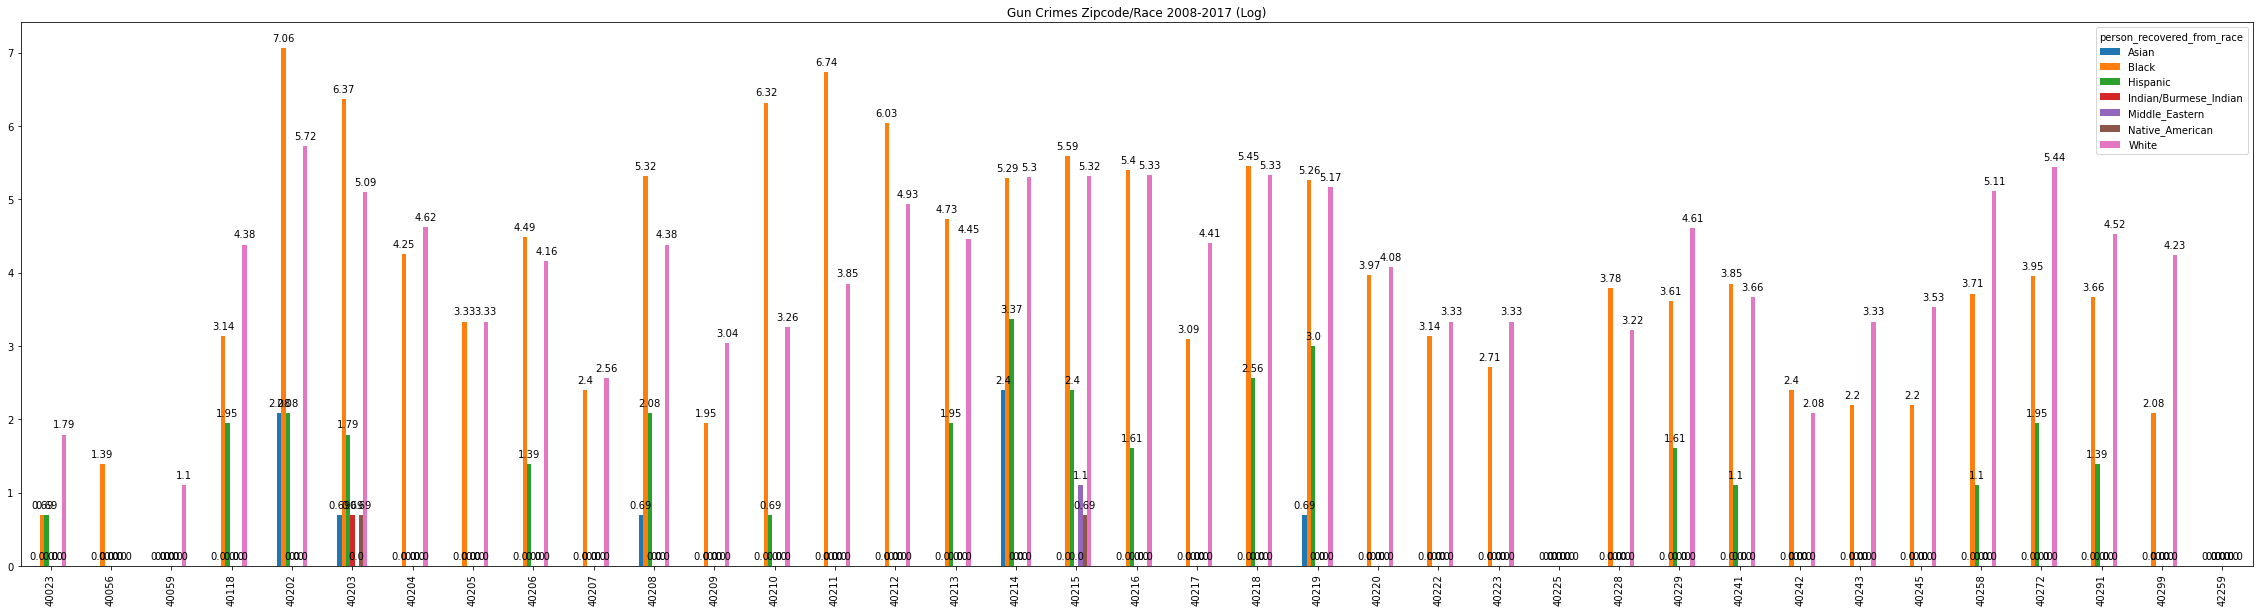

In [217]:
ax21 = firearm_data_zip_race_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Zipcode/Race 2008-2017 (Log)', figsize = (40,10))
for p in ax21.patches:
    ax21.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('count_zip_race_crime_log.png')

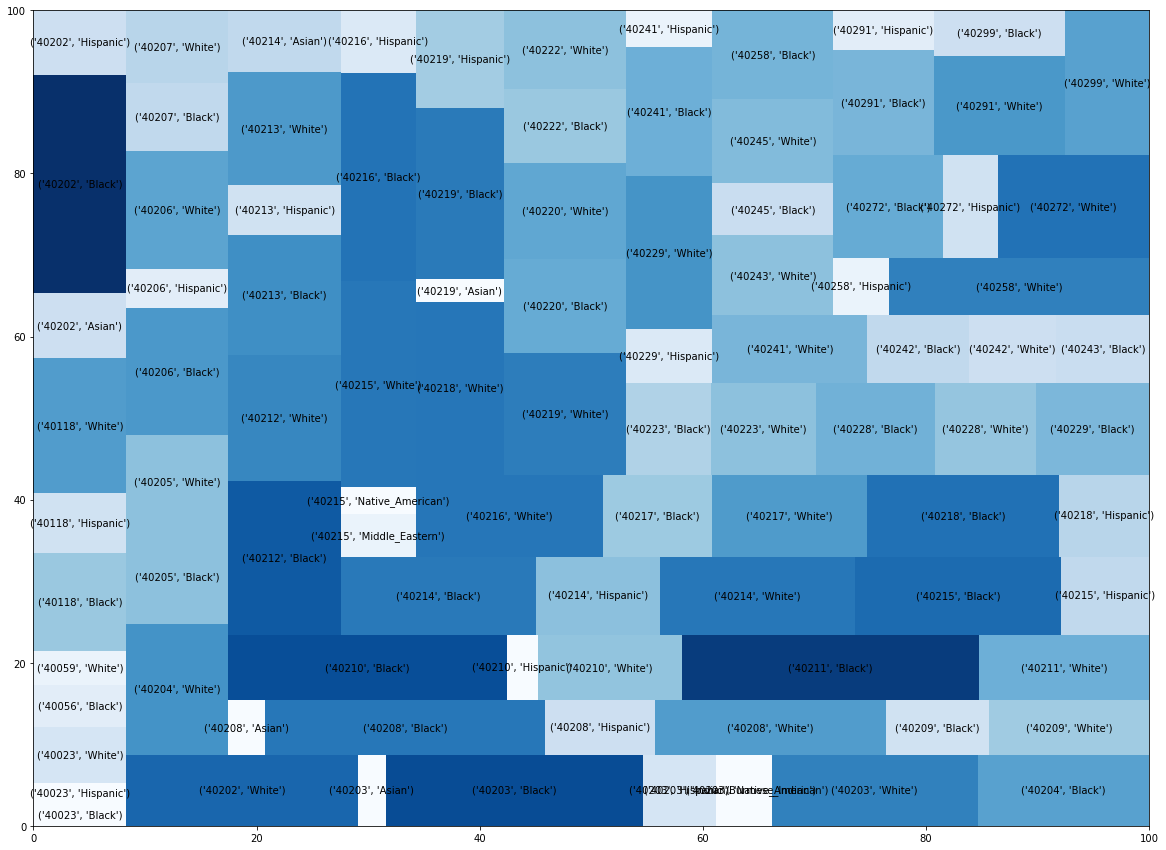

In [218]:
norm = mpcolors.Normalize(vmin=min(firearm_data_zip_race_log_zero.log_values), vmax=max(firearm_data_zip_race_log_zero.log_values))
colors = [cmpl.Blues(norm(value)) for value in firearm_data_zip_race_log_zero.log_values]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20, 15)
sq.plot(label = firearm_data_zip_race_log_zero.index, sizes = firearm_data_zip_race_log_zero.log_values, color = colors)
plt.savefig('count_zip_race_crime_heatmap.png')

### 5.9: Grouping zipcode and year

In [219]:
firearm_data_zip_year = firearm_data[['zipcode', 'year']]
firearm_data_zip_year['count_of_crimes'] = firearm_data_zip_year['year']

<ipython-input-219-3c71cf5ba26f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firearm_data_zip_year['count_of_crimes'] = firearm_data_zip_year['year']


In [220]:
firearm_data_zip_year = firearm_data_zip_year.groupby([firearm_data_zip_year['zipcode'], firearm_data_zip_year['year']]).count()

In [221]:
firearm_data_zip_year

count_of_crimes
zipcode year                 
40023   2013                7
        2014                2
        2016                1
40056   2010                1
        2013                1
...                       ...
40299   2015                4
        2016               38
        2017                1
42259   2014                1
47130   2015                1

[270 rows x 1 columns]

In [222]:
firearm_data_zip_year_heat = firearm_data_zip_year.reset_index()

In [223]:
firearm_data_zip_year_heat

,zipcode,year,count_of_crimes
0,40023,2013,7
1,40023,2014,2
2,40023,2016,1
3,40056,2010,1
4,40056,2013,1
...,...,...,...
265,40299,2015,4
266,40299,2016,38
267,40299,2017,1
268,42259,2014,1


In [224]:
zip_year_pivot = firearm_data_zip_year_heat.pivot("zipcode", "year", "count_of_crimes")

In [225]:
zip_year_pivot = zip_year_pivot.replace(np.NaN, 0)

In [226]:
zip_year_pivot

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
zipcode,,,,,,,,,,
40023,0.0,0.0,0.0,0.0,0.0,7.0,2.0,0.0,1.0,0.0
40056,0.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0
40058,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
40059,0.0,0.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0
40118,0.0,0.0,13.0,3.0,24.0,16.0,23.0,29.0,8.0,9.0
40165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40177,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40202,0.0,0.0,115.0,145.0,172.0,370.0,357.0,644.0,293.0,92.0
40203,1.0,0.0,125.0,144.0,123.0,82.0,88.0,124.0,145.0,38.0


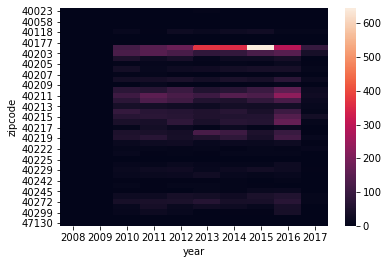

In [227]:
sns.heatmap(zip_year_pivot)
plt.savefig('zip_year_pivot.png')

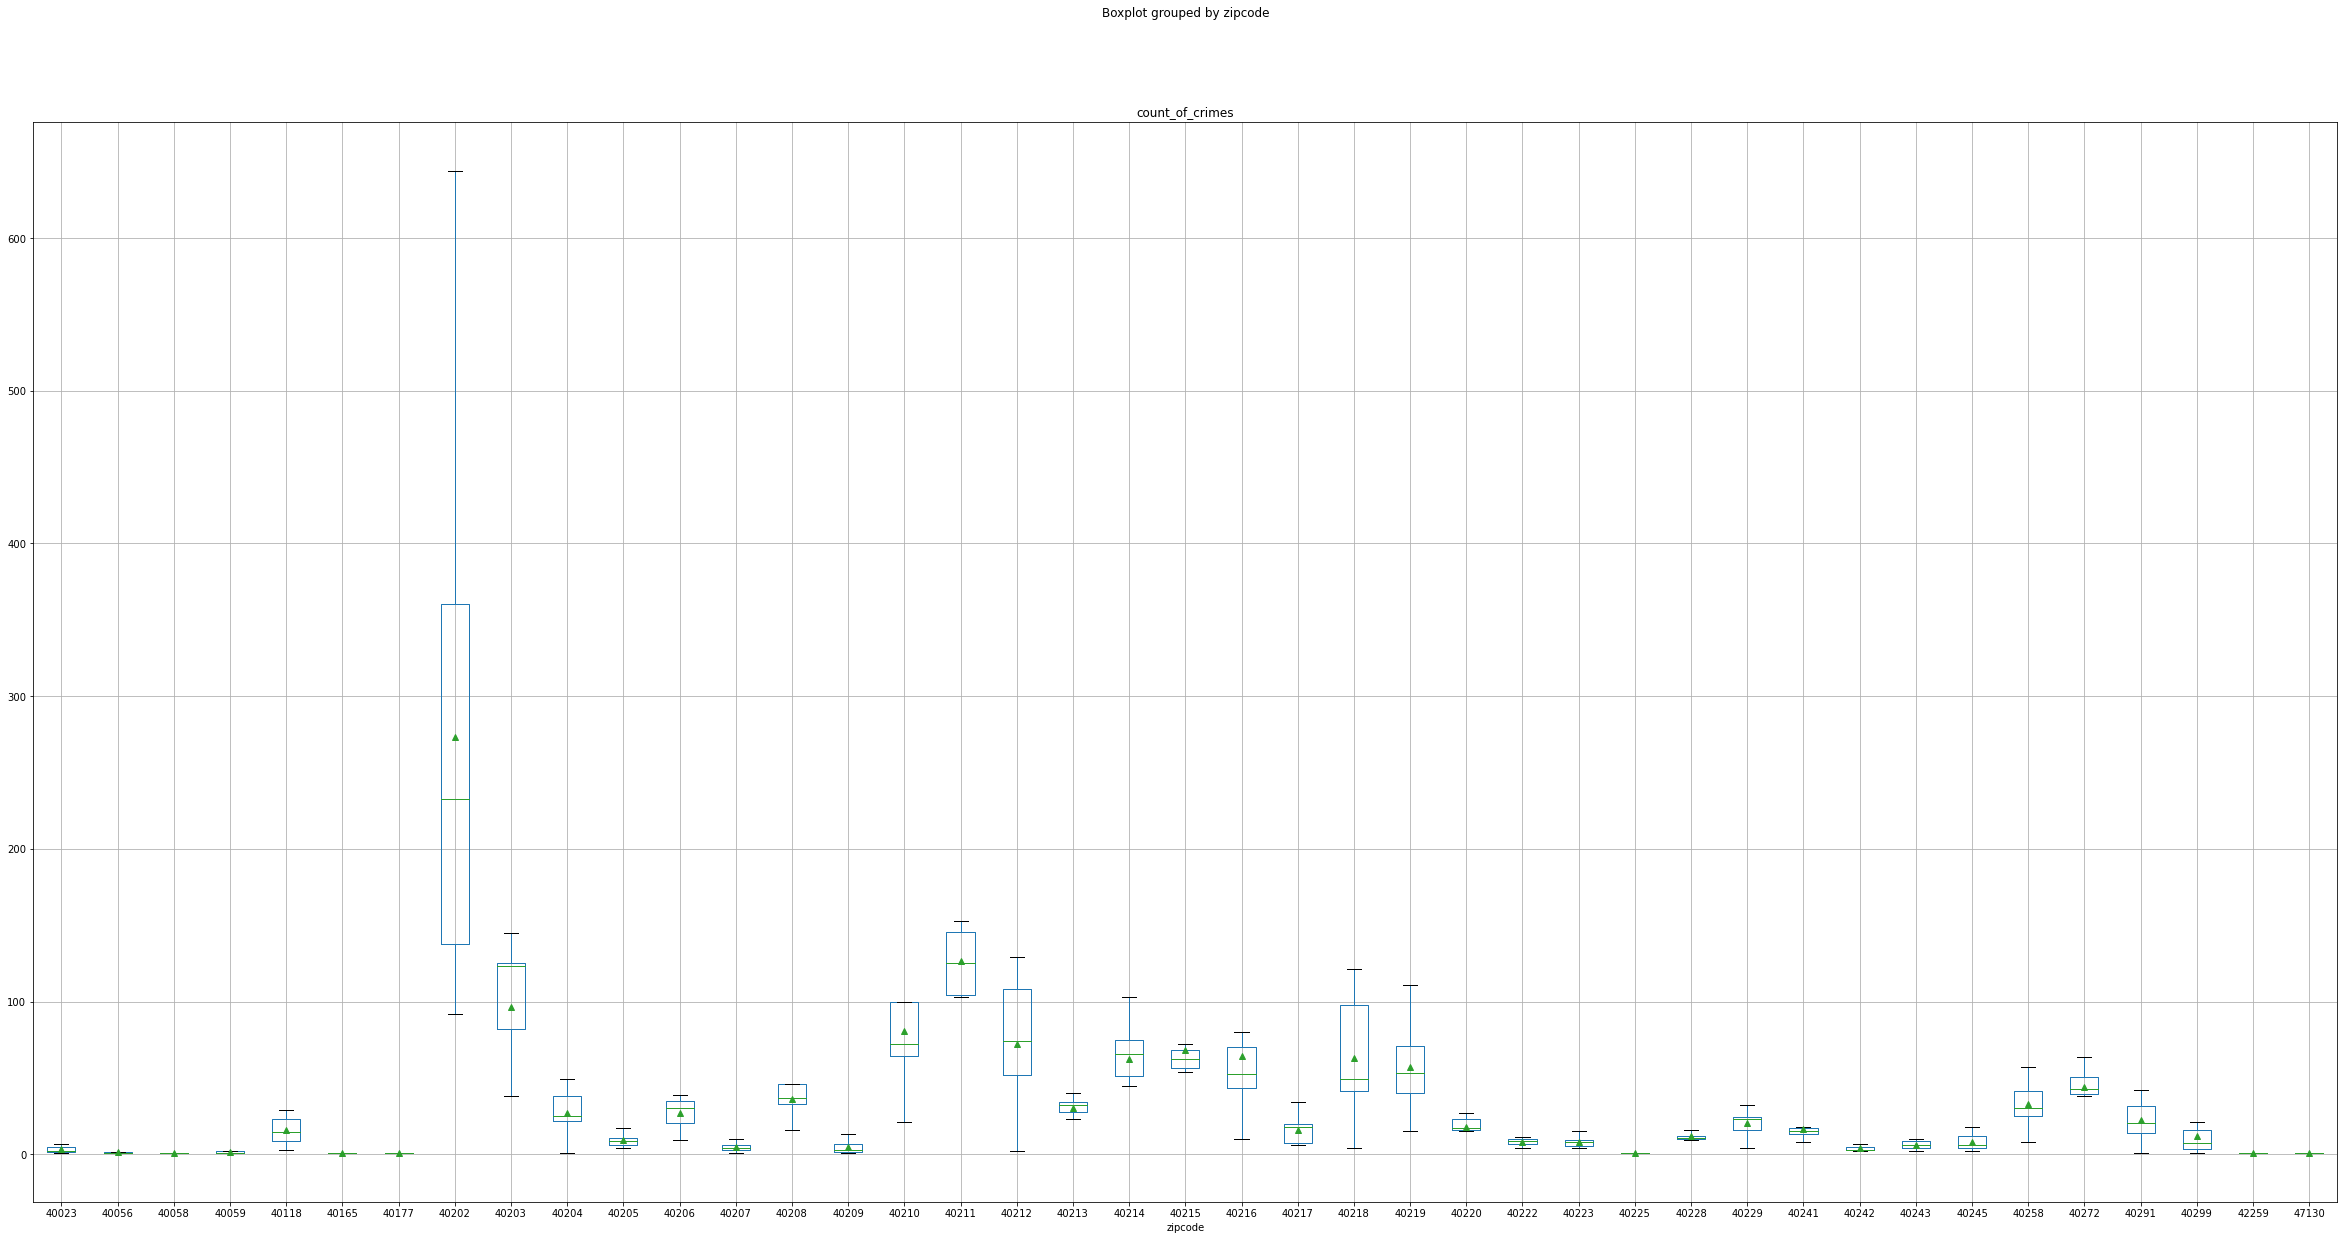

In [228]:
ax12 = firearm_data_zip_year_heat.boxplot(column="count_of_crimes", by="zipcode", figsize=(40,20), showfliers = False, showmeans = True)
plt.savefig('zip_boxplot.png')

#### 5.9.1: Zipcode and year with log values

In [229]:
firearm_data_zip_year_log = firearm_data_zip_year
firearm_data_zip_year_log['log_values'] = np.log(firearm_data_zip_year_log['count_of_crimes'])
firearm_data_zip_year_log.drop('count_of_crimes', axis = 1, inplace = True)

In [230]:
firearm_data_zip_year_log_heat = firearm_data_zip_year.reset_index()

In [231]:
zip_year_log_pivot = firearm_data_zip_year_log_heat.pivot("zipcode", "year", "log_values")
zip_year_log_pivot = zip_year_log_pivot.replace(np.NaN, 0)
zip_year_log_pivot

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
zipcode,,,,,,,,,,
40023,0.0,0.000000,0.000000,0.000000,0.000000,1.945910,0.693147,0.000000,0.000000,0.000000
40056,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000
40058,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40059,0.0,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40118,0.0,0.000000,2.564949,1.098612,3.178054,2.772589,3.135494,3.367296,2.079442,2.197225
40165,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40177,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40202,0.0,0.000000,4.744932,4.976734,5.147494,5.913503,5.877736,6.467699,5.680173,4.521789
40203,0.0,0.000000,4.828314,4.969813,4.812184,4.406719,4.477337,4.820282,4.976734,3.637586


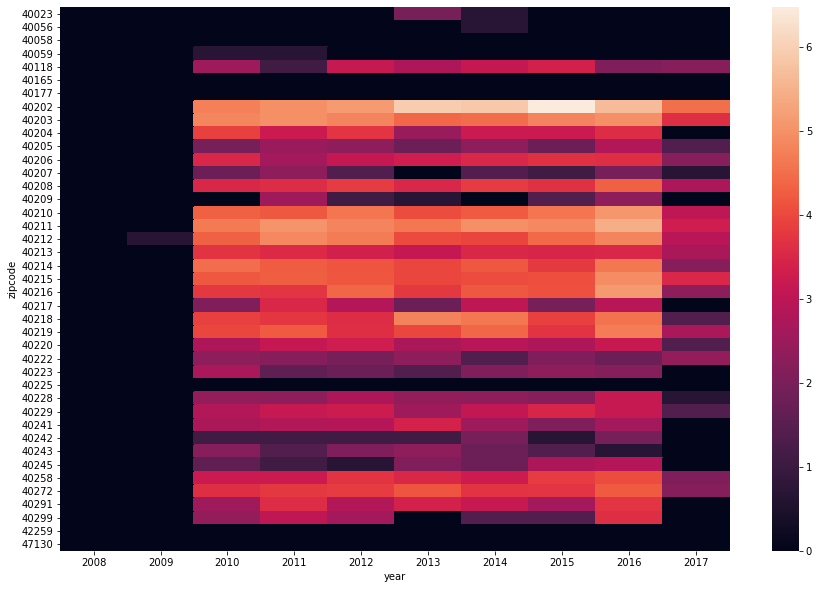

In [232]:
fig, ax22 = plt.subplots(figsize = (15,10))
sns.heatmap(zip_year_log_pivot, ax=ax22)
plt.savefig('zip_year_log_pivot.png')

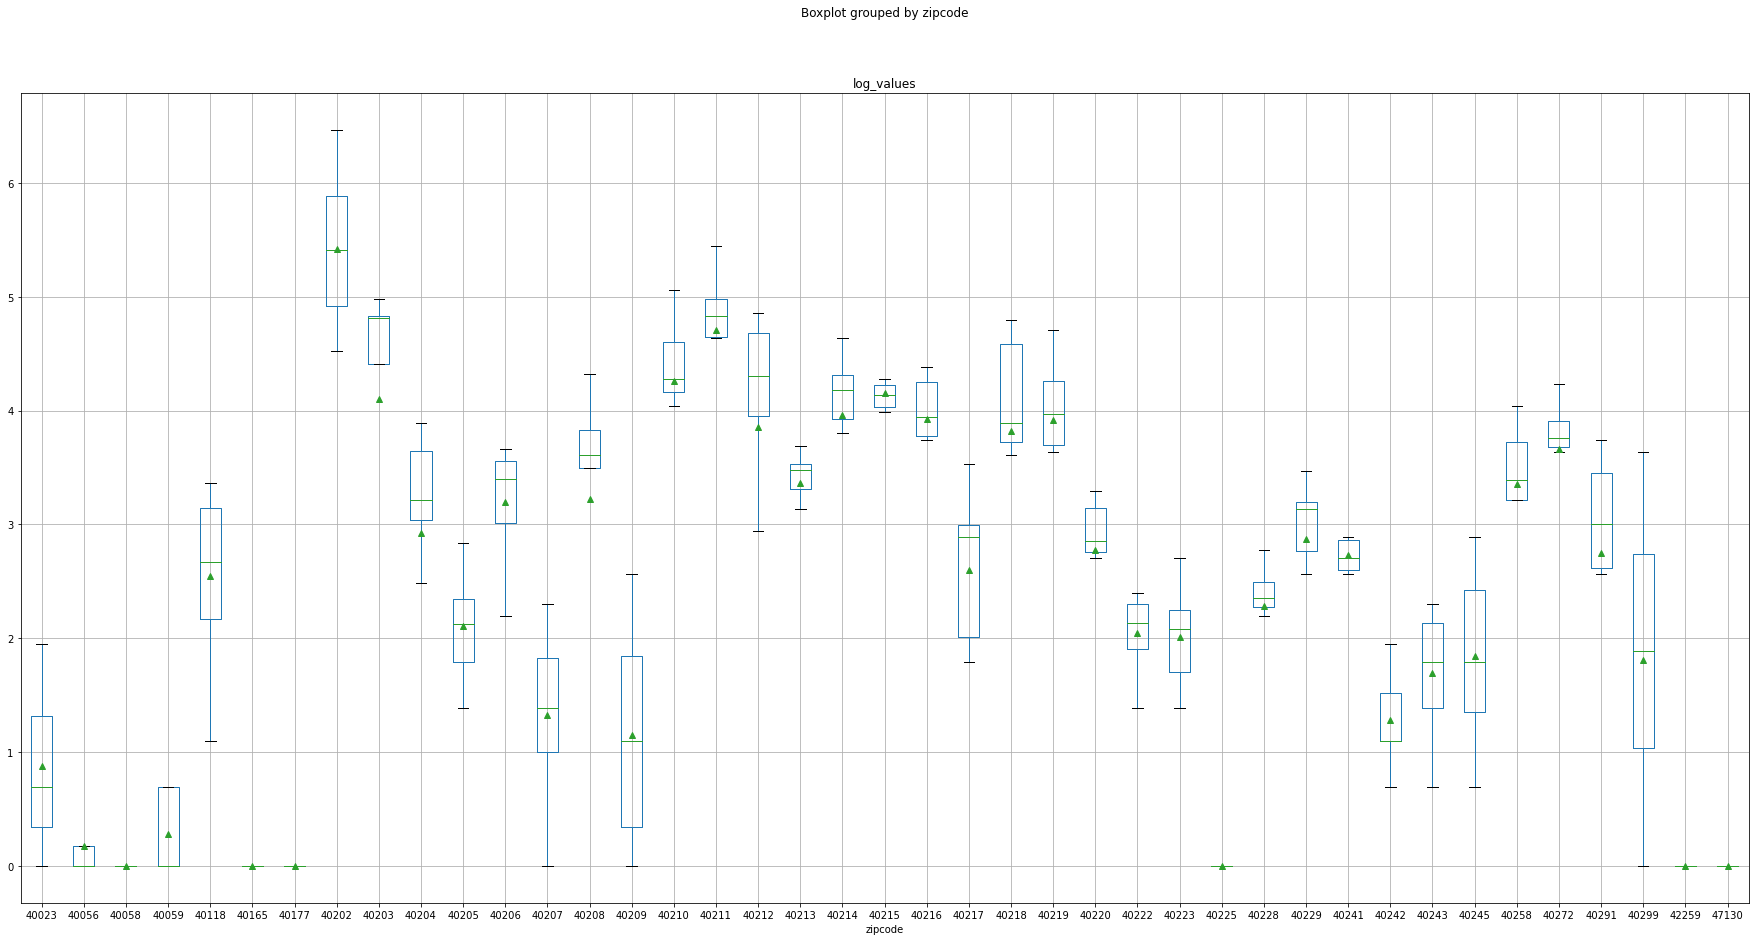

In [233]:
ax12 = firearm_data_zip_year_log_heat.boxplot(column="log_values", by="zipcode", figsize=(30,15), showfliers = False, showmeans = True)
plt.savefig('zip_boxplot_log.png')

#### 5.9.2: Viewing Yearly Gun Crime Count Trends for each Zipcode

In [234]:
zip_year_line = firearm_data_zip_year

In [235]:
zip_year_line = firearm_data_zip_year.reset_index('year')

In [236]:
zip_year_line

,year,log_values
zipcode,,
40023,2013,1.945910
40023,2014,0.693147
40023,2016,0.000000
40056,2010,0.000000
40056,2013,0.000000
...,...,...
40299,2015,1.386294
40299,2016,3.637586
40299,2017,0.000000


In [237]:
zip_year_raw = firearm_data[['zipcode', 'year']]

In [238]:
def zipcode_indiv_data(zipc):
    zip_data = zip_year_raw
    search_zipcode = str(zipc)
    query = "zipcode=="+"'"+search_zipcode+"'"
    df = zip_data.query(query)
    df['count_of_crimes'] = df['year']
    df.drop(df[['zipcode']], axis=1, inplace= True)
    df = df.groupby('year').count()
    return df

In [239]:
def zipcode_indiv_data_plot(zipc):
    plot_df = zipcode_indiv_data(zipc)
    df_plot_title = "Count of Gun Crimes for Zipcode " + str(zipc)
    df_plot = plot_df.plot(title = df_plot_title)
    plot_name = "zip_line_year_"+str(zipc)+".png"
    plt.savefig(plot_name)
    return df_plot

In [240]:
zip_list = list(firearm_data_zip_year_heat['zipcode'].unique())

In [241]:
zip_list

['40023',
 '40056',
 '40058',
 '40059',
 '40118',
 '40165',
 '40177',
 '40202',
 '40203',
 '40204',
 '40205',
 '40206',
 '40207',
 '40208',
 '40209',
 '40210',
 '40211',
 '40212',
 '40213',
 '40214',
 '40215',
 '40216',
 '40217',
 '40218',
 '40219',
 '40220',
 '40222',
 '40223',
 '40225',
 '40228',
 '40229',
 '40241',
 '40242',
 '40243',
 '40245',
 '40258',
 '40272',
 '40291',
 '40299',
 '42259',
 '47130']

<ipython-input-238-961d44f5ad6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_of_crimes'] = df['year']
C:\Users\cxp6628\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-238-961d44f5ad6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

<ipython-input-238-961d44f5ad6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_of_crimes'] = df['year']
C:\Users\cxp6628\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-238-961d44f5ad6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

<ipython-input-238-961d44f5ad6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_of_crimes'] = df['year']
C:\Users\cxp6628\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-238-961d44f5ad6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

<ipython-input-238-961d44f5ad6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_of_crimes'] = df['year']
C:\Users\cxp6628\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-238-961d44f5ad6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

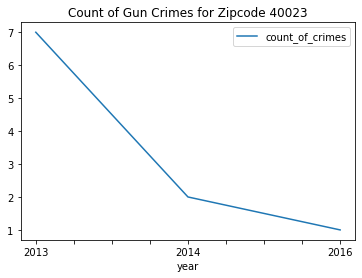

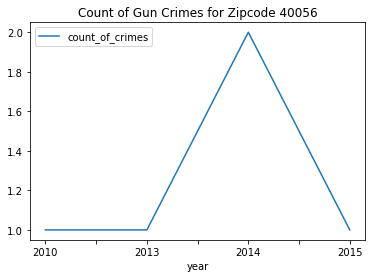

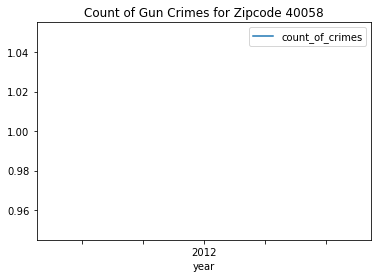

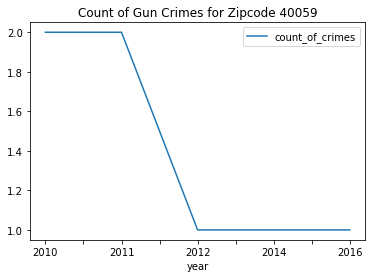

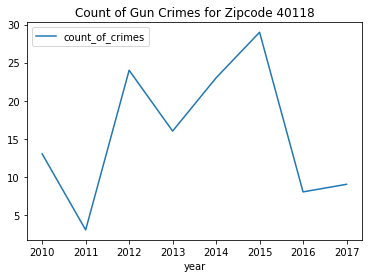

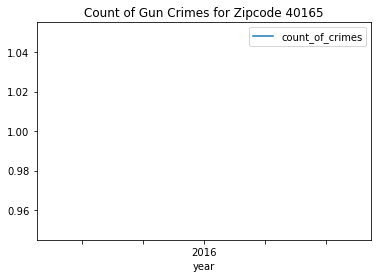

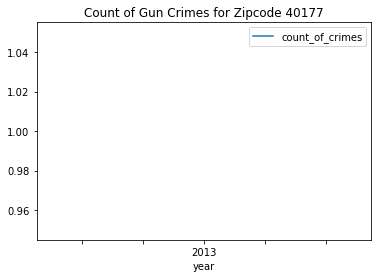

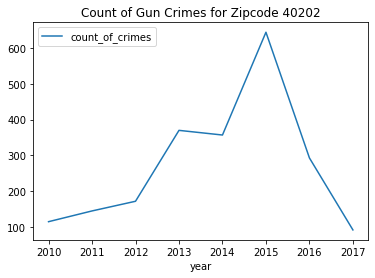

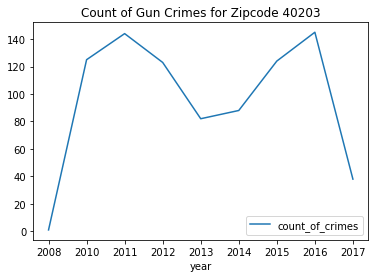

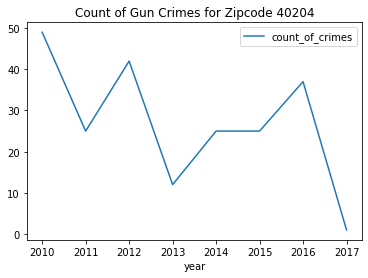

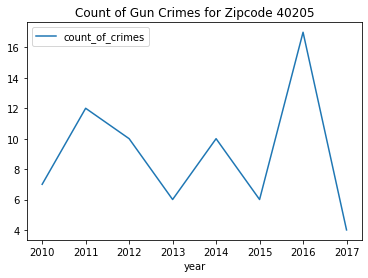

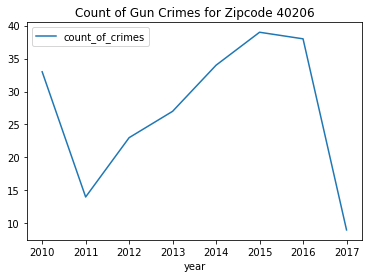

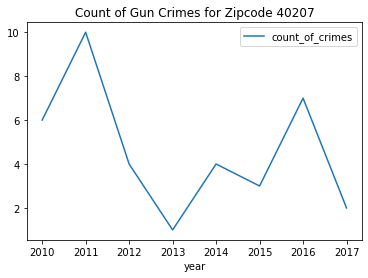

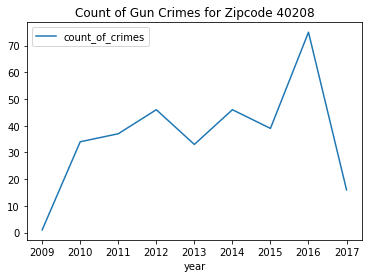

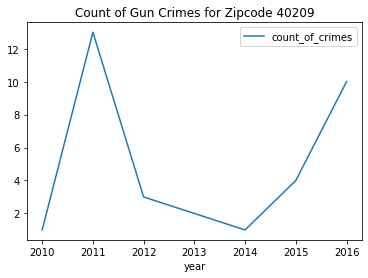

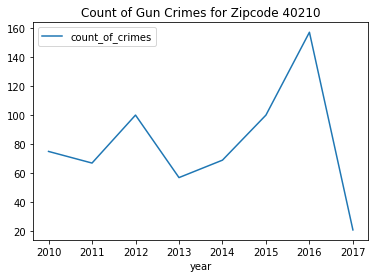

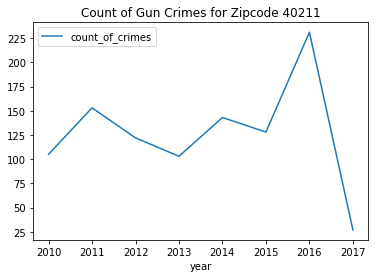

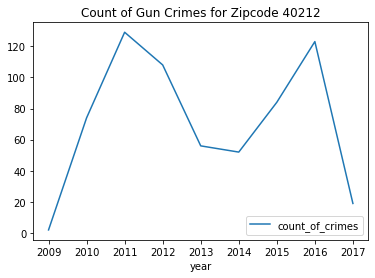

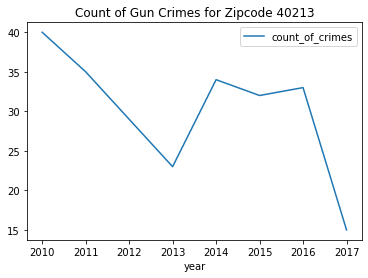

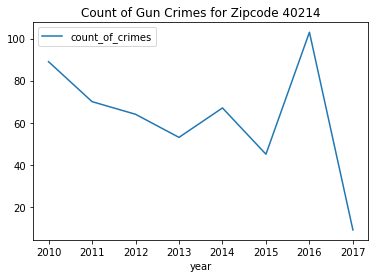

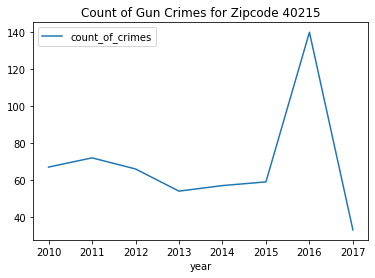

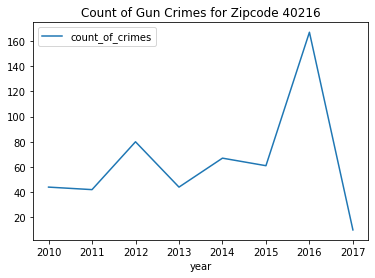

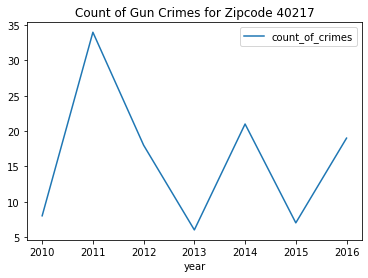

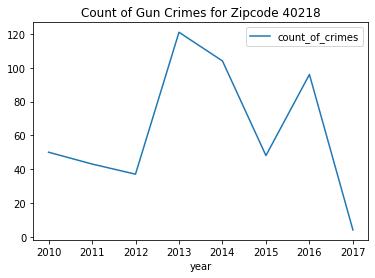

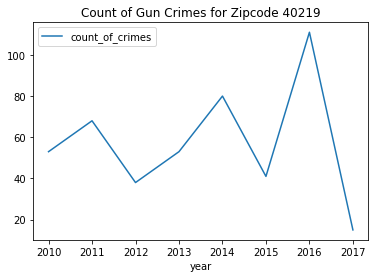

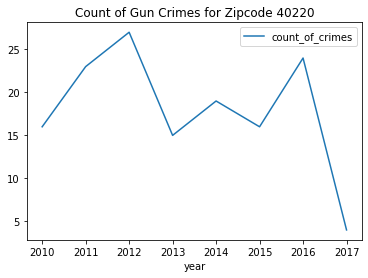

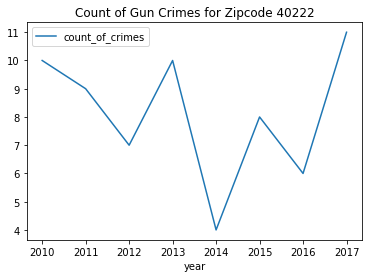

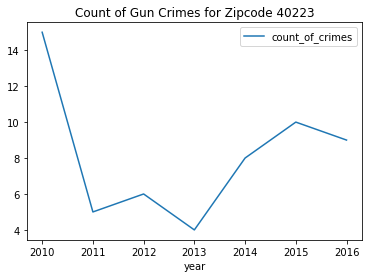

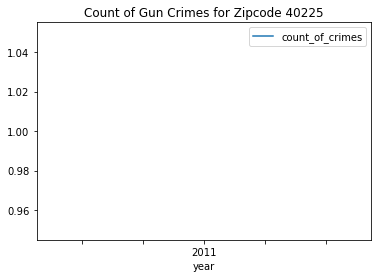

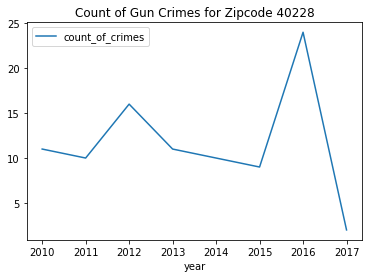

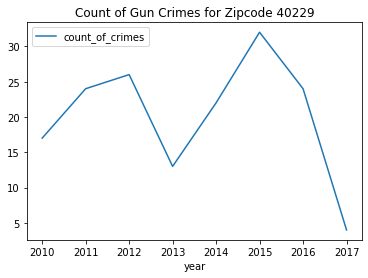

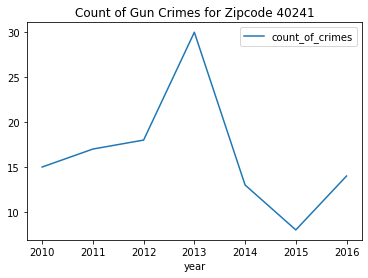

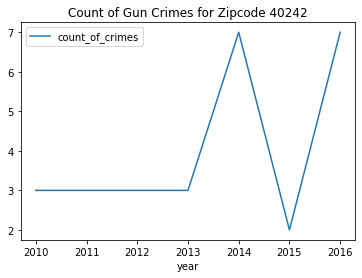

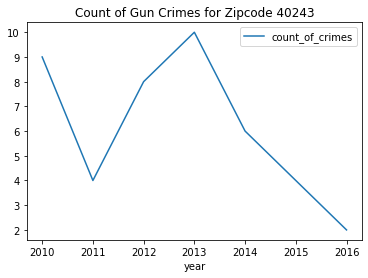

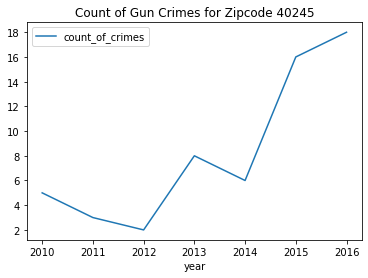

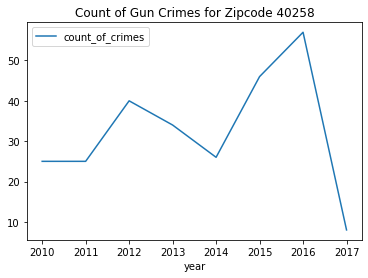

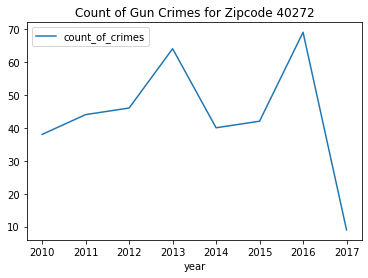

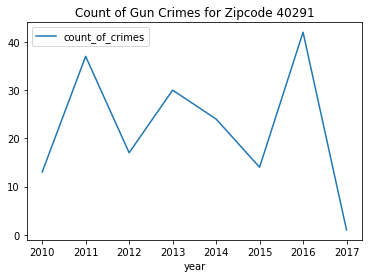

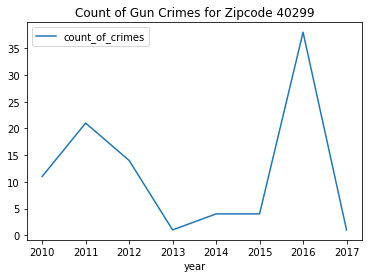

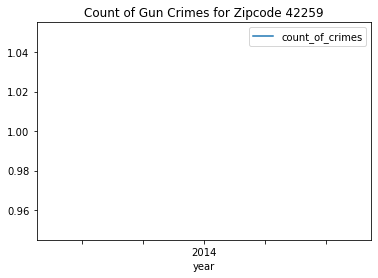

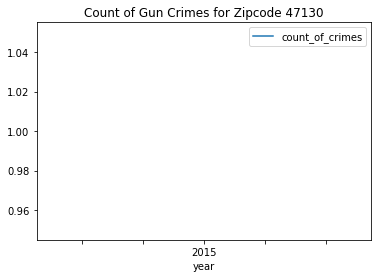

In [242]:
for i in zip_list:
    zipcode_indiv_data_plot(i)

### 5.10: Plotting Race and UCR Category

In [ ]:
firearm_data_race_ucr = firearm_data[['person_recovered_from_race', 'ucr_category']]

In [ ]:
firearm_data_race_ucr['count_of_incidents'] = firearm_data_race_ucr['ucr_category']

In [ ]:
firearm_data_race_ucr = firearm_data_race_ucr.groupby(['ucr_category', 'person_recovered_from_race']).count()

In [ ]:
firearm_data_race_ucr

In [ ]:
ax23 = firearm_data_race_ucr.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017', figsize = (30,20))
for p in ax23.patches:
    ax23.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('count_race_ucr_unstacked.png')

In [ ]:
ax25 = firearm_data_race_ucr.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017', figsize = (30,20), stacked = True)
plt.savefig('count_race_ucr_stacked.png')

#### 5.10.1: Race and UCR Category with Log Values

In [ ]:
firearm_data_race_ucr_log = firearm_data_race_ucr
firearm_data_race_ucr_log['log_values'] = np.log(firearm_data_race_ucr['count_of_incidents'])
firearm_data_race_ucr_log = firearm_data_race_ucr_log[firearm_data_race_ucr_log['log_values'] != 0]

In [ ]:
ax24 = firearm_data_race_ucr_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017 (Log)', figsize = (50,20))
for p in ax24.patches:
    ax24.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('count_race_ucr_log_unstacked.png')

In [ ]:
ax26 = firearm_data_race_ucr_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017 (Log)', figsize = (50,20), stacked = True)
plt.savefig('count_race_ucr_log_stacked.png')

### 5.11 Plotting UCR Category and Year

In [ ]:
firearm_data_year_ucr = firearm_data[['year', 'ucr_category']]

In [ ]:
firearm_data_year_ucr['count_of_incidents'] = firearm_data_year_ucr['ucr_category']

In [ ]:
firearm_data_year_ucr = firearm_data_year_ucr.groupby(['ucr_category', 'year']).count()

In [ ]:
firearm_data_year_ucr

In [ ]:
ax27 = firearm_data_year_ucr.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Year/UCR Category 2008-2017', figsize = (50,20))
for p in ax27.patches:
    ax27.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('count_year_ucr_unstacked.png')

In [ ]:
ax28 = firearm_data_year_ucr.unstack().plot(kind='bar', xlabel='', title='Gun Crimes Year/UCR Category 2008-2017', figsize = (30,20), stacked = True)
plt.savefig('count_year_ucr_stacked.png')

### 5.12: Plotting Year and UCR Category

In [ ]:
firearm_data_ucr_year = firearm_data[['ucr_category', 'year']]

In [ ]:
firearm_data_ucr_year['count_of_incidents'] = firearm_data_ucr_year['ucr_category']

In [ ]:
firearm_data_ucr_year = firearm_data_ucr_year.groupby(['year', 'ucr_category']).count()

In [ ]:
firearm_data_ucr_year

In [ ]:
ax29 = firearm_data_ucr_year.unstack().plot(kind='bar', xlabel='', title='Gun Crimes UCR Category/Year 2008-2017', figsize = (30,20))
for p in ax29.patches:
    ax29.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('count_ucr_year_unstacked.png')

In [ ]:
ax28 = firearm_data_ucr_year.unstack().plot(kind='bar', xlabel='', title='Gun Crimes UCR Category/Year 2008-2017', figsize = (30,20), stacked = True)
plt.savefig('count_ucr_year_stacked.png')

#### 5.11.1 Race and UCR Category Log

In [ ]:
firearm_data_race_ucr_log = firearm_data_race_ucr
firearm_data_race_ucr_log['log_values'] = np.log(firearm_data_race_ucr['count_of_incidents'])
firearm_data_race_ucr_log = firearm_data_race_ucr_log[firearm_data_race_ucr_log['log_values'] != 0]

In [ ]:
ax24 = firearm_data_race_ucr_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017 (Log)', figsize = (50,20))
for p in ax24.patches:
    ax24.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.savefig('count_race_ucr_log_unstacked.png')

In [ ]:
ax26 = firearm_data_race_ucr_log['log_values'].unstack().plot(kind='bar', xlabel='', title='Gun Crimes Race/UCR Category 2008-2017 (Log)', figsize = (50,20), stacked = True)
plt.savefig('count_race_ucr_log_stacked.png')